# <center> **Machine Learning** </center>

### **PART A**

1. Paper Contribution
2. Data Pre-processing
3. Machine Learning Activity
4. Result analysis with metrics used from paper
5. Exploratory Data Analysis / Visualization

##### **Paper:** https://arxiv.org/pdf/2211.01551

#### **1. Paper Contribution:**

1. A comprehensive crime dataset for Bangladesh, incorporating spatio-temporal, weather, and demographic data across six crime types over seven years, reflecting the influence of various factors on crime occurrence extracted from a daily newspaper, a weather database, and Bangladesh National Census report.
2. Data quality is enhanced through feature engineering and optimizing it for machine learning tasks.
3. Perform exploratory data analysis to uncover valuable patterns in the dataset.
4. Supervised machine learning algorithms like Random Forest, XGBoost, AdaBoost, Extra Tree, and Decision Tree are employed for forecasting criminal incidents. SMOTE oversampling technique is utilized to minimize data imbalance problem and to achieve strong accuracy in crime prediction. The findings of this study is expected to assist the law enforcement agencies in prediction & prevention of crimes and also to help crime patrol resource allocation in Bangladesh.

#### **2. Data Preprocessing:**

Data preprocessing and transformation is very much necessary as the dataset is developed from various news articles. Three basic features which are prominantly processed were:

1. Incident Place:
- Locations in news articles vary in format and may include different combinations of Union, Upazila, and District information.
- Official names from Wikipedia and government websites are used to correct inconsistencies and FuzzyWuzzy string matching is applied to correct misspellings.
- Missing location names like villages or stations are manually verified using Google and replaced with corresponding Upazila or municipal area names.

2. Incident Date:
- Dates appear in various formats (e.g., "March 29", "June 27, 2018").
- Implicit date phrases like ("last Friday", "yesterday") are manually adjusted based on the publication date.
- Dates are standardized to the "Day-Month-Year" format.

3. Part of the Day of the Incident:
- Exact incident times are rarely mentioned; instead, parts of the day are used.
- Time slots are categorized into different parts of the day based on the context provided in the news articles.

Feature Engineering:
- Min-Max normalization technique is used for Feature Scaling.
- Label encoding is used for categorical data.

After data processing phase, the final dataset contains 6674 instances of crimes and 36 features like crime-type, geo-location, temporal, weather, and demographic data.

#### **3. Machine Learning Activity:**

Five supervised machine learning algorithms are used in Experimental setup: Decision Tree, Extra Tree, Random Forest, Adaboost, and Extreme Gradient Boost (XGBoost).

1. For Decision tree, the maximum depth of a tree is set to 20.
2. For Extra Tree, the number of trees is set to 100.
3. For Random Forest, the number of trees is set to 2000, and gini co-efficient is used for splitting.
4. For AdaBoost, the number of trees is set to 50 and learning rate is set to 1.0.
5. For XGBoost, the number of trees, maximum depth, and the learning rate are set to 100, 10, and 0.3 respectively.

- All other hyperparameters are set to default settings of the ScikitLearn libraries.
- All experiments are performed on Google Colab environment.

- Dataset is split into two groups train and test with percentages of 90% and 10% respectively.
- The training set is used for learning (and validation) purpose, and the test set is used for evaluation of the metrics.

#### **4. Result analysis with metrics used from paper**

Random Forest’s performance tops the list, which is followed by that of Extra Tree and XGBoost.
Performance for all the classifiers for the original dataset in terms of the evaluation metrics are shown below:
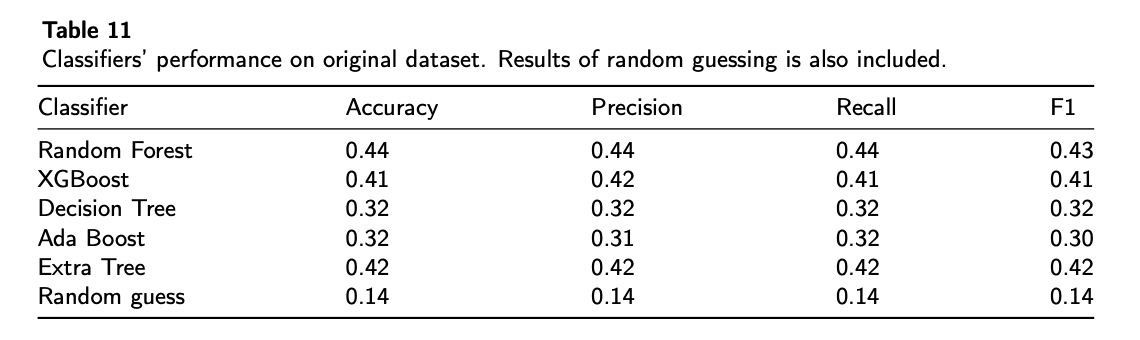

Evaluating Random Forest results for each class:
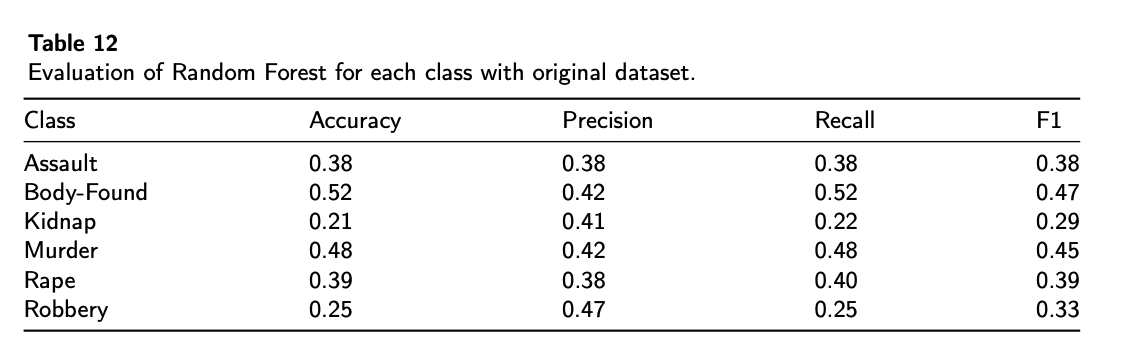

We see that for the two minority classes, namely, kidnapping and robbery, the performance is relatively lower due to class imbalance problem. Hence by exclusing those two minority classes, the classifiers evaluation metrics for the updated dataset is:
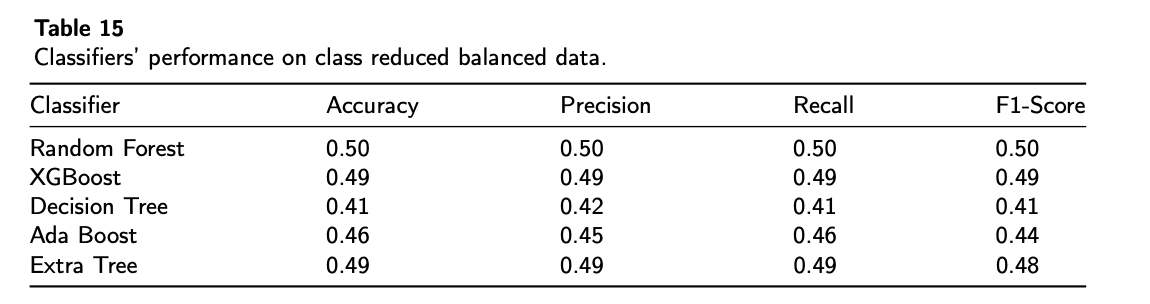



#### **5. Exploratory Data Analysis / Visualization:**

1. Class distribution of dataset:<br/>
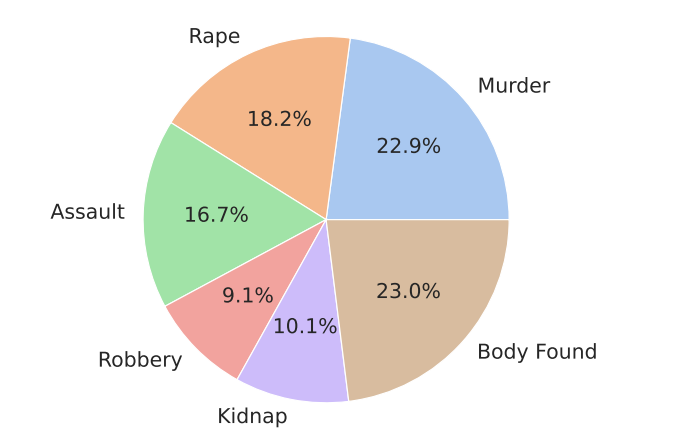

2. Population density and crime relation in Districts:<br/>
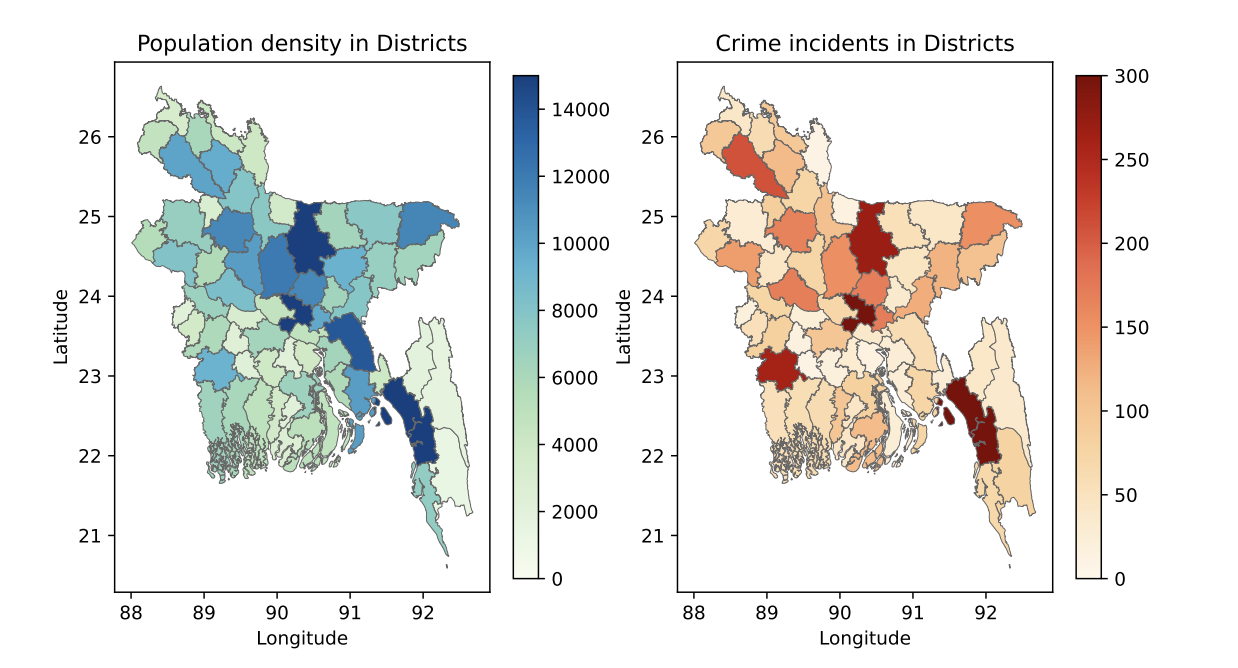

3. Crime incidents occurring in various Divisions:<br/>
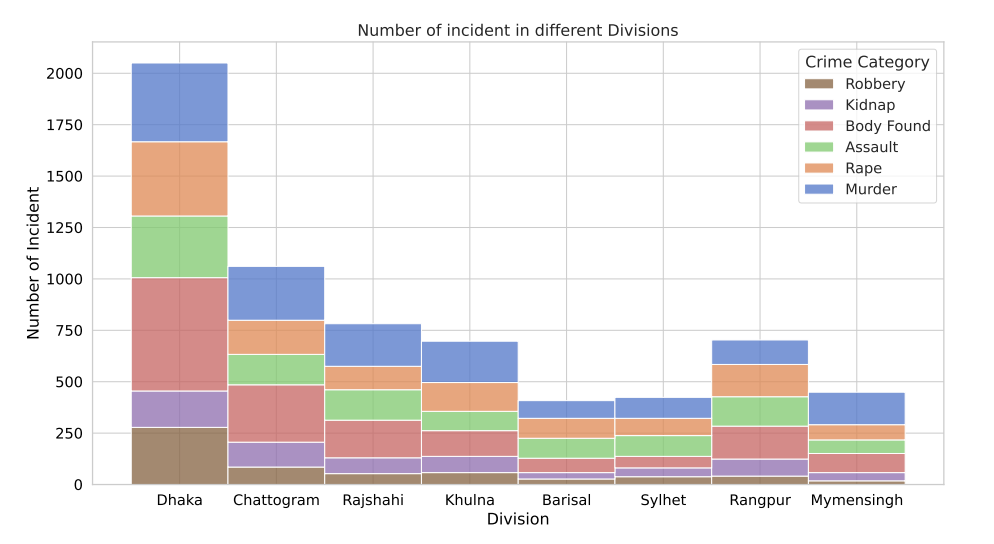

4. Crime incidents occurring in various seasons:<br/>
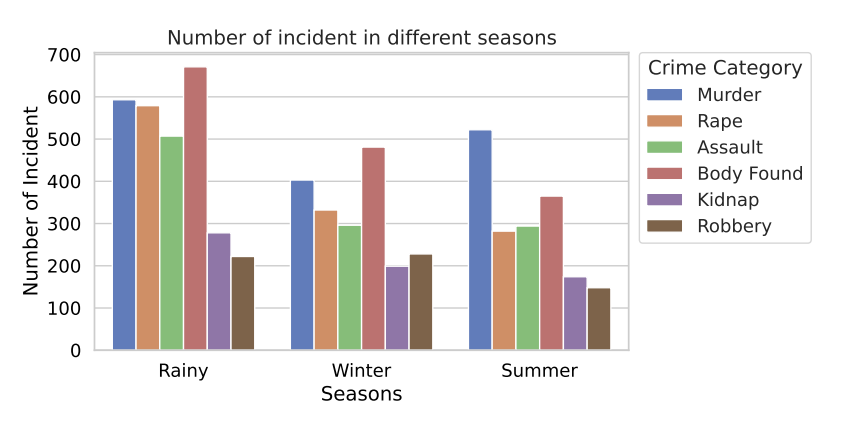

5. Crime incidents occurring in various months:<br/>
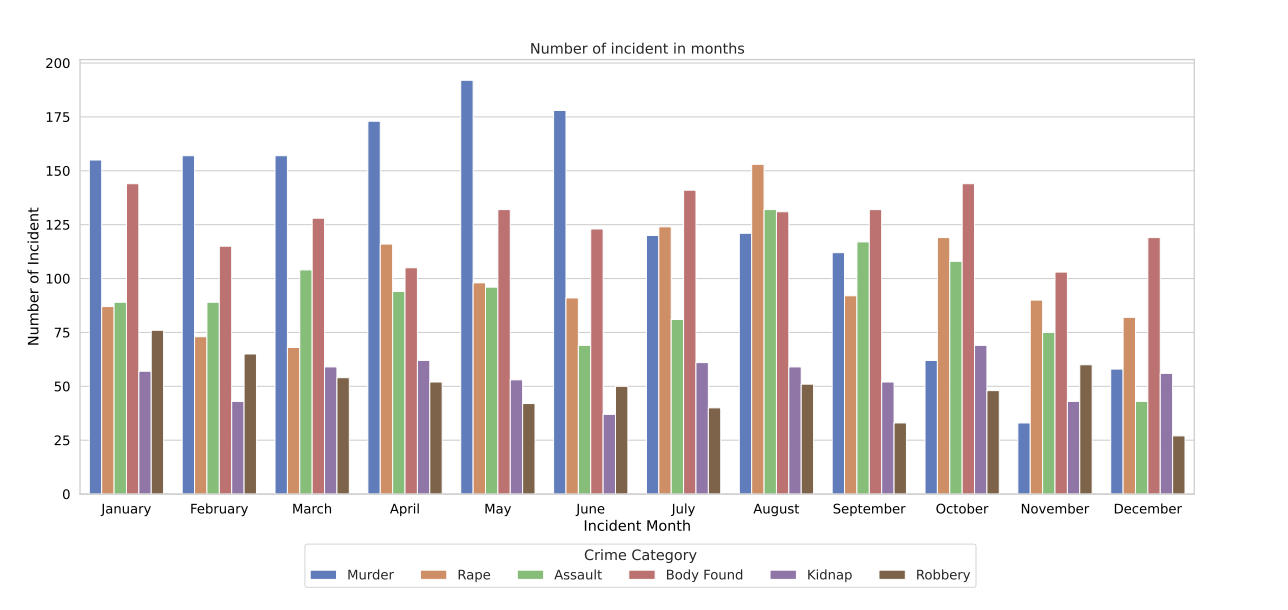

6. Crime incidents occurring in varying average temperature and humidity:<br/>
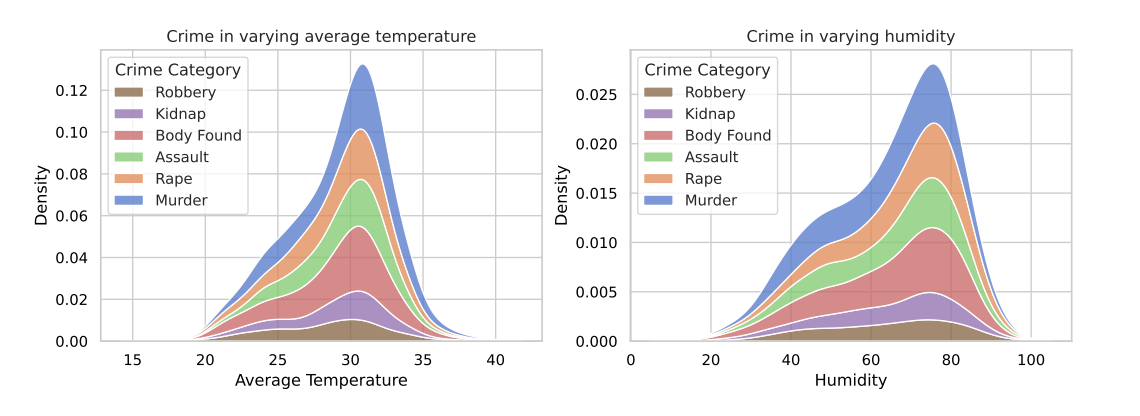

7. Crime incidents in different part of the day:<br/>
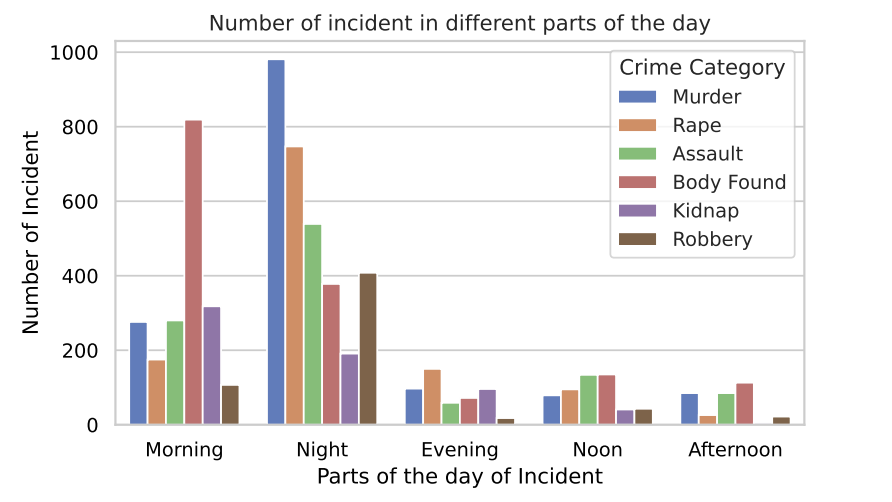

8. Crime incidents in different weekdays:<br/>
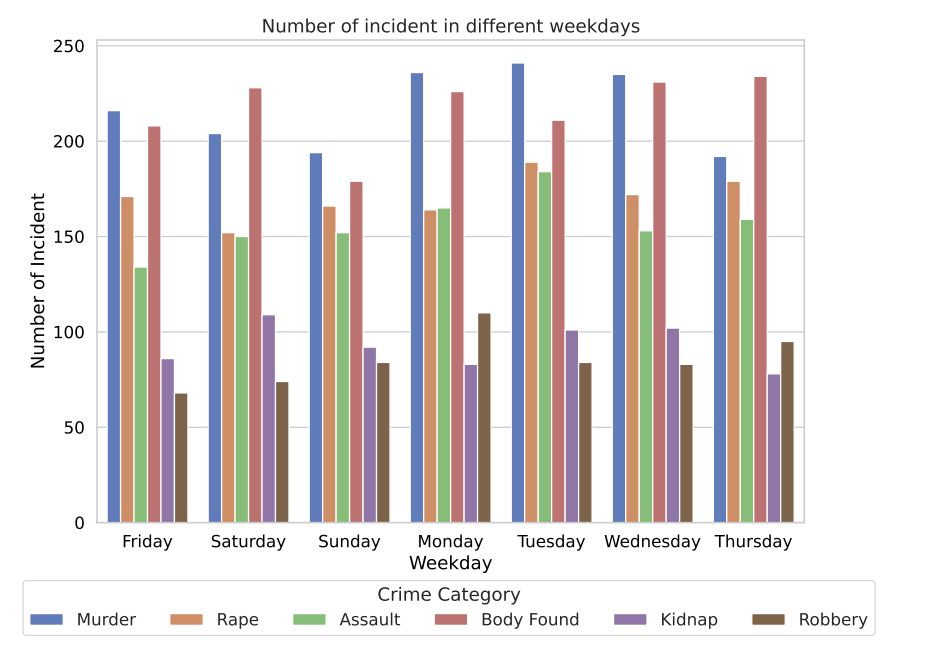


#### **PART B**

1. **Performing Exploratory Data Analysis (EDA) to gain insights from the dataset.**
2. **Regression**
3. **Classification**
4. **Ensemble ML**

#### **Performing Exploratory Data Analysis (EDA) to gain insights from the dataset**

# 1. Perform and explain necessary pre-processing / feature engineering on this dataset [0.5]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
# Load the dataframe from a CSV file
df = pd.read_csv('dataSetFull.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8129 entries, 0 to 8128
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8129 non-null   object 
 1   price_tnd            6421 non-null   float64
 2   price_eur            6421 non-null   float64
 3   location             8129 non-null   object 
 4   city                 6813 non-null   object 
 5   governorate          8129 non-null   object 
 6   Area                 7944 non-null   float64
 7   pieces               6940 non-null   float64
 8   room                 7720 non-null   float64
 9   bathroom             7470 non-null   float64
 10  age                  3984 non-null   object 
 11  state                7029 non-null   float64
 12  latt                 8094 non-null   float64
 13  long                 8094 non-null   float64
 14  distance_to_capital  8094 non-null   float64
 15  garage               8129 non-null   i

In [3]:
### Data Exploration Functions ###

# Get the number of rows and columns in the data set
def display_dataframe_shape(df):
    rows, columns = df.shape
    print("There are {} rows and {} columns in the data set".format(rows, columns))

In [4]:
# Explore the data set variables

# Display the first 5 rows of the dataframe
display(df.head())

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.00,8.00,NaN,NaN,NaN,36.58,10.34,30.82,0,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.00,1007500.00,El Kantaoui,Hammam Sousse,Sousse,1000.00,26.00,16.00,14.00,30-50,1.00,35.90,10.58,108.79,1,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.00,620000.00,Sousse Corniche,Sousse Ville,Sousse,932.00,24.00,24.00,10.00,NaN,1.00,35.83,10.63,118.32,0,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.00,620000.00,Sousse Corniche,Sousse Ville,Sousse,932.00,24.00,24.00,NaN,NaN,NaN,35.83,10.63,118.32,0,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.00,620000.00,Sousse Corniche,Sousse Ville,Sousse,932.00,24.00,24.00,10.00,NaN,1.00,35.83,10.63,118.32,0,0,0,0,0,0,0,1,1,1,1


In [5]:
# Display the last 5 rows of the dataframe
display(df.tail())

,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
8124,d6533c0a-666a-4fe4-8c20-6a97561bfb24,NaN,NaN,Sahloul,Sousse Ville,Sousse,NaN,NaN,2.00,2.00,0,2.00,35.83,10.62,117.40,1,0,0,0,0,0,1,0,1,1,1
8125,3c3ac15d-12a9-46bb-9227-8c2c98de4007,NaN,NaN,El Kantaoui,Hammam Sousse,Sousse,NaN,NaN,NaN,NaN,NaN,NaN,35.86,10.60,113.68,0,0,0,0,0,1,1,0,0,0,0
8126,d3b30b43-9377-45c1-8e22-626f11a29638,NaN,NaN,Carthage,Carthage,tunis,NaN,NaN,NaN,3.00,NaN,NaN,36.87,10.32,16.51,1,0,0,0,0,0,1,0,0,1,1
8127,a970dfc9-4d39-4d7e-bd10-0fdcfc27ab04,NaN,NaN,La Marsa,NaN,tunis,NaN,NaN,NaN,1.00,NaN,NaN,36.88,10.33,17.72,0,0,0,0,0,0,0,0,0,0,0
8128,a9ee278d-7e1c-4e2c-a3f3-d54c40ca2772,NaN,NaN,Les Berges Du Lac 2,La Marsa,tunis,NaN,NaN,3.00,NaN,NaN,2.00,36.85,10.27,10.83,0,0,0,0,0,1,0,0,0,0,0


In [6]:
# Display the shape of the dataframe
display_dataframe_shape(df)

# Display the data types of each column
display(df.dtypes)

There are 8129 rows and 26 columns in the data set


id                      object
price_tnd              float64
price_eur              float64
location                object
city                    object
governorate             object
Area                   float64
pieces                 float64
room                   float64
bathroom               float64
age                     object
state                  float64
latt                   float64
long                   float64
distance_to_capital    float64
garage                   int64
garden                   int64
concierge                int64
beach_view               int64
mountain_view            int64
pool                     int64
elevator                 int64
furnished                int64
equipped_kitchen         int64
central_heating          int64
air_conditioning         int64
dtype: object

In [7]:
#determine the numerical features and describe them
df.describe()

,price_tnd,price_eur,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
count,6421.00,6421.00,7944.00,6940.00,7720.00,7470.00,7029.00,8094.00,8094.00,8094.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00,8129.00
mean,681286.67,211258.83,369.74,4.32,3.33,2.00,1.39,36.42,10.40,65.50,0.47,0.00,0.25,0.10,0.08,0.23,0.26,0.05,0.57,0.56,0.55
std,882532.06,273726.22,955.11,2.27,2.02,1.24,0.57,1.14,0.41,126.35,0.50,0.00,0.43,0.31,0.28,0.42,0.44,0.21,0.50,0.50,0.50
min,6500.00,2015.00,20.00,1.00,1.00,1.00,0.00,0.00,-0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,260000.00,80600.00,117.00,3.00,2.00,1.00,1.00,36.40,10.20,11.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,420000.00,130200.00,178.00,4.00,3.00,2.00,1.00,36.82,10.33,17.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
75%,780000.00,241800.00,371.00,5.00,4.00,2.00,2.00,36.88,10.61,72.83,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00
max,19000000.00,5890000.00,22000.00,27.00,50.00,20.00,2.00,40.57,11.33,4224.95,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [8]:
# Drop garden as all records have only single value
df.drop('garden', axis=1, inplace=True)

In [9]:
df.describe().columns

Index(['price_tnd', 'price_eur', 'Area', 'pieces', 'room', 'bathroom', 'state',
       'latt', 'long', 'distance_to_capital', 'garage', 'concierge',
       'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished',
       'equipped_kitchen', 'central_heating', 'air_conditioning'],
      dtype='object')

In [10]:
#leftover features are categorical
categorical_cols = df.columns.difference(df.describe().columns).to_list()
print(categorical_cols)
for col in categorical_cols:
    counts = df[col].value_counts(dropna=False).reset_index()
    counts.columns = [col, "count"]
    percentages = df[col].value_counts(dropna=False, normalize=True).reset_index()
    percentages.columns = [col, "proportion"]
    result = counts.merge(percentages, on=col)
    result["proportion"] = result["proportion"].apply(lambda x: x * 100)
    print(f"{col}: Top 5 and bottom 5 records")
    print(pd.concat([result.head(5), result.tail(5)]).drop_duplicates())
    print("\n")

['age', 'city', 'governorate', 'id', 'location']
age: Top 5 and bottom 5 records
             age  count  proportion
0            NaN   4145       50.99
1              0   1471       18.10
2           1-5     826       10.16
3          5-10     671        8.25
4         10-20     557        6.85
6          10,20    124        1.53
7         30-50     104        1.28
8         50-70      22        0.27
9   Plus de 100       9        0.11
10       70-100       7        0.09


city: Top 5 and bottom 5 records
                city  count  proportion
0                NaN   1316       16.19
1           La Marsa   1095       13.47
2           Hammamet   1093       13.45
3          La Soukra    628        7.73
4       Ariana Ville    553        6.80
66              Douz      2        0.02
67      Borj El Amri      1        0.01
68  Kalaat Landalous      1        0.01
69          Tebourba      1        0.01
70         El Battan      1        0.01


governorate: Top 5 and bottom 5 records
     g

In [11]:
# Delete "id" columns as its unique for each row and does not provide any useful information
df.drop('id', axis=1, inplace=True)
categorical_cols.remove('id')

In [12]:
df.columns
categorical_cols

['age', 'city', 'governorate', 'location']

In [13]:
categorical_cols = ['location','city','governorate']
ordinal_cols = ['age']
numerical_cols = df.describe().columns.to_list()
print(categorical_cols)
print(ordinal_cols)
print(numerical_cols)

['location', 'city', 'governorate']
['age']
['price_tnd', 'price_eur', 'Area', 'pieces', 'room', 'bathroom', 'state', 'latt', 'long', 'distance_to_capital', 'garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning']


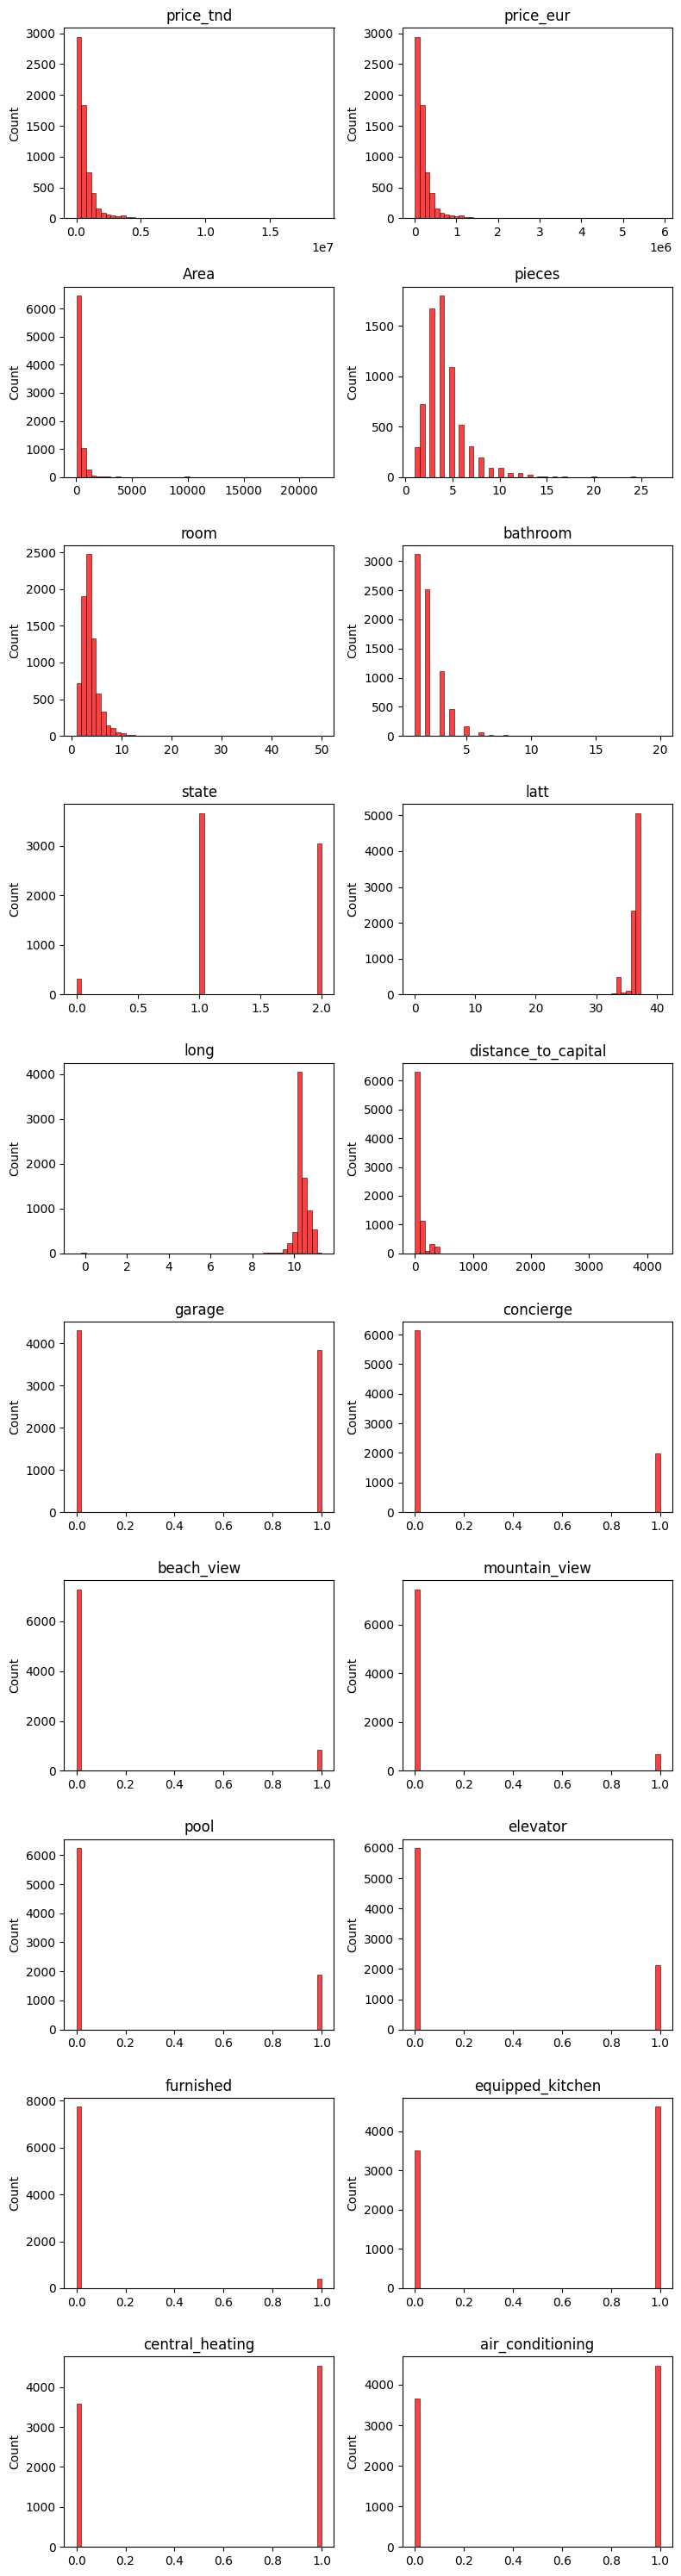

In [14]:
# visualize distribution of numerical columns
fig, ax = plt.subplots(int(np.ceil(len(numerical_cols)/2)), 2, figsize=(8, 30))
ax = ax.flatten()
# Iterate over the numerical columns and corresponding axes
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=50, ax=ax[i], color='red')
    ax[i].set_title(col)
    ax[i].set_xlabel('')

# Remove any empty subplots (if number of subplots is more than columns)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
fig.show()

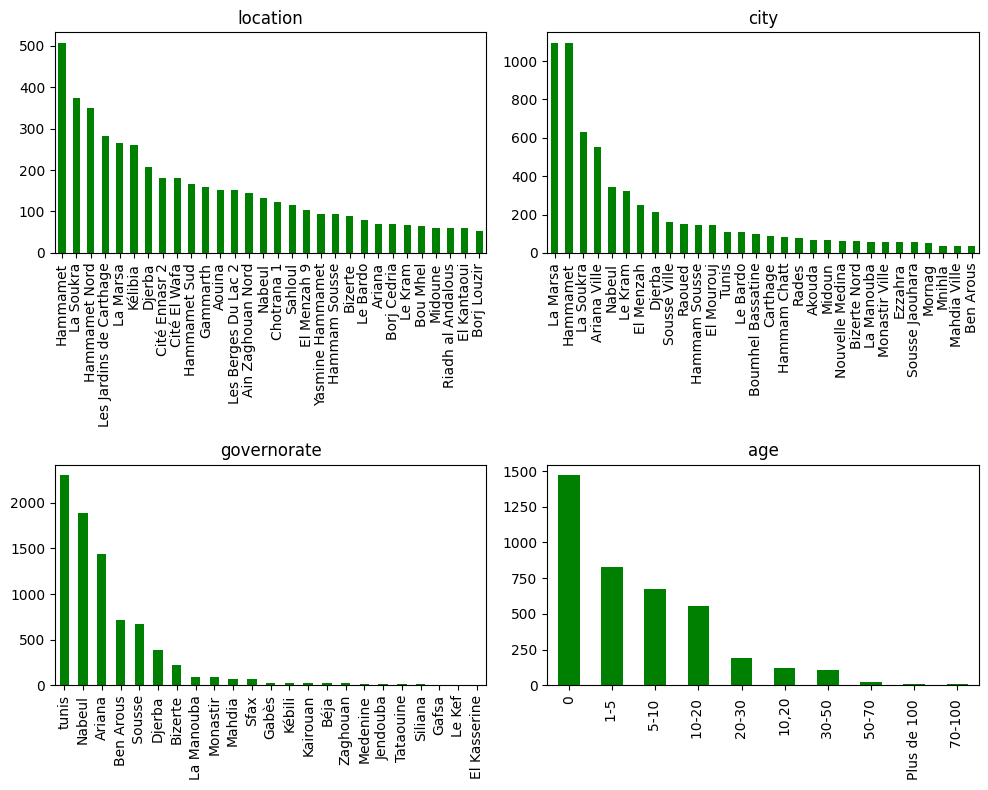

In [15]:
# visualize distribution of nominal and ordinal categorical columns
display_cols = categorical_cols + ordinal_cols
fig, ax = plt.subplots(int(np.ceil(len(display_cols)/2)), 2, figsize=(10, 8))
ax = ax.flatten()
# Iterate over the numerical columns and corresponding axes
for i, col in enumerate(display_cols):
    df[col].value_counts().sort_values(ascending=False).head(30).plot(kind='bar', ax=ax[i], color='green')
    ax[i].set_title(col)
    ax[i].set_xlabel('')

# Remove any empty subplots (if number of subplots is more than columns)
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
fig.show()

### Data Pre-processing, Feature Engineering + Visualisation

In [16]:
### Data Preprocessing ###

# Drop duplicates
df.drop_duplicates(inplace=True)
display_dataframe_shape(df)


There are 7971 rows and 24 columns in the data set


In [17]:
### Data Cleaning ###

# Strip the leading and trailing whitespaces from the columns
# also convert to lower case for uniformity
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)
df.head()

,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,age,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,NaN,NaN,cité el bassatine ancien,boumhel bassatine,ben arous,NaN,27.00,8.00,NaN,NaN,NaN,36.58,10.34,30.82,0,0,0,0,0,0,0,0,0,0
1,3250000.00,1007500.00,el kantaoui,hammam sousse,sousse,1000.00,26.00,16.00,14.00,30-50,1.00,35.90,10.58,108.79,1,1,1,0,0,1,1,1,1,1
2,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,10.00,NaN,1.00,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1
3,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,NaN,NaN,NaN,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1
4,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,10.00,NaN,1.00,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1


In [18]:
# We can convert the ordinal value to numerical based on the mean of the ranges
# This is better than simple substitution with numbers as it retains more of the original information
print("\nage:")
unique_values = df['age'].unique()
mean_map = {
    '0': 0,
    '1-5': 3,
    '5-10': 7.5,
    '10-20': 15,
    '10,20': 15,
    '20-30': 25,
    '30-50': 40,
    '50-70': 60,
    '70-100': 85,
    'plus de 100': 100
}
print("Before conversion: ", unique_values)
df['mean_age'] = df['age'].map(mean_map)
unique_values = df['mean_age'].unique()
print("After conversion: ", unique_values)
df.drop('age', axis=1, inplace=True)
numerical_cols.append('mean_age')
df.head()


age:
Before conversion:  [nan '30-50' '1-5' '0' '5-10' '10-20' '20-30' '70-100' '10,20'
 'plus de 100' '50-70']
After conversion:  [  nan  40.    3.    0.    7.5  15.   25.   85.  100.   60. ]


,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,state,latt,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning,mean_age
0,NaN,NaN,cité el bassatine ancien,boumhel bassatine,ben arous,NaN,27.00,8.00,NaN,NaN,36.58,10.34,30.82,0,0,0,0,0,0,0,0,0,0,NaN
1,3250000.00,1007500.00,el kantaoui,hammam sousse,sousse,1000.00,26.00,16.00,14.00,1.00,35.90,10.58,108.79,1,1,1,0,0,1,1,1,1,1,40.00
2,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,10.00,1.00,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1,NaN
3,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,NaN,NaN,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1,NaN
4,2000000.00,620000.00,sousse corniche,sousse ville,sousse,932.00,24.00,24.00,10.00,1.00,35.83,10.63,118.32,0,0,0,0,0,0,1,1,1,1,NaN


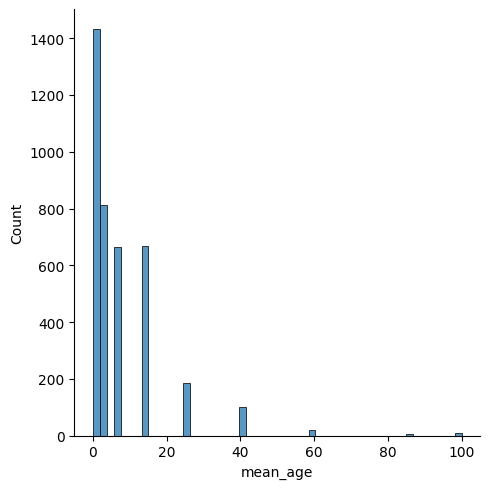

In [19]:
sns.displot(df['mean_age'])

In [20]:
# Check for missing values
display(df.isna().sum())

price_tnd              1668
price_eur              1668
location                  0
city                   1229
governorate               0
Area                    177
pieces                 1154
room                    406
bathroom                650
state                  1086
latt                     35
long                     35
distance_to_capital      35
garage                    0
concierge                 0
beach_view                0
mountain_view             0
pool                      0
elevator                  0
furnished                 0
equipped_kitchen          0
central_heating           0
air_conditioning          0
mean_age               4067
dtype: int64

In [21]:
# Filling missing values: city column

before_processing = df['city'].isna().sum()
print("Initial number of missing values in city column: ", before_processing)

# Fetch all the location in each city, to fill missing values of city column more meaningfully.
location_city = {}
for local in df['location'].dropna().unique():
    d1 = df[df['location'] == local]['city'].dropna()
    if len(d1) > 0:
        location_city[local] = d1.mode()[0]

# Fill missing values in city column using location column
df.loc[df['city'].isna(), 'city'] = df[df['city'].isna()]['location'].map(location_city)

nan_values = df['city'].isna().sum()
filled_values = before_processing - nan_values

print("Number of city records filled smartly: ", filled_values)
print("Number of city records remaining which are still empty (will be removed): ", nan_values)

# Remove city records if the location is not available
df.dropna(subset=['city'], inplace=True)


Initial number of missing values in city column:  1229
Number of city records filled smartly:  404
Number of city records remaining which are still empty (will be removed):  825


In [22]:
# price is target, so we drop na values
df.dropna(subset=['price_eur'], inplace=True)
df.shape

(5689, 24)

In [23]:
# Filling remaining numerical values with median

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
# Check for missing values
display(df.isna().sum())

price_tnd              0
price_eur              0
location               0
city                   0
governorate            0
Area                   0
pieces                 0
room                   0
bathroom               0
state                  0
latt                   0
long                   0
distance_to_capital    0
garage                 0
concierge              0
beach_view             0
mountain_view          0
pool                   0
elevator               0
furnished              0
equipped_kitchen       0
central_heating        0
air_conditioning       0
mean_age               0
dtype: int64

In [24]:
print("Total number of records before final duplicates removal: ", df.shape[0])

# Drop duplicates if any after filling missing values
df.drop_duplicates(inplace=True)

print("Total number of records after final duplicates removal: ", df.shape[0])

# Check for missing values after filling and converting
display(df.info())

Total number of records before final duplicates removal:  5689
Total number of records after final duplicates removal:  5688
<class 'pandas.core.frame.DataFrame'>
Index: 5688 entries, 1 to 8104
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price_tnd            5688 non-null   float64
 1   price_eur            5688 non-null   float64
 2   location             5688 non-null   object 
 3   city                 5688 non-null   object 
 4   governorate          5688 non-null   object 
 5   Area                 5688 non-null   float64
 6   pieces               5688 non-null   float64
 7   room                 5688 non-null   float64
 8   bathroom             5688 non-null   float64
 9   state                5688 non-null   float64
 10  latt                 5688 non-null   float64
 11  long                 5688 non-null   float64
 12  distance_to_capital  5688 non-null   float64
 13  garage            

None

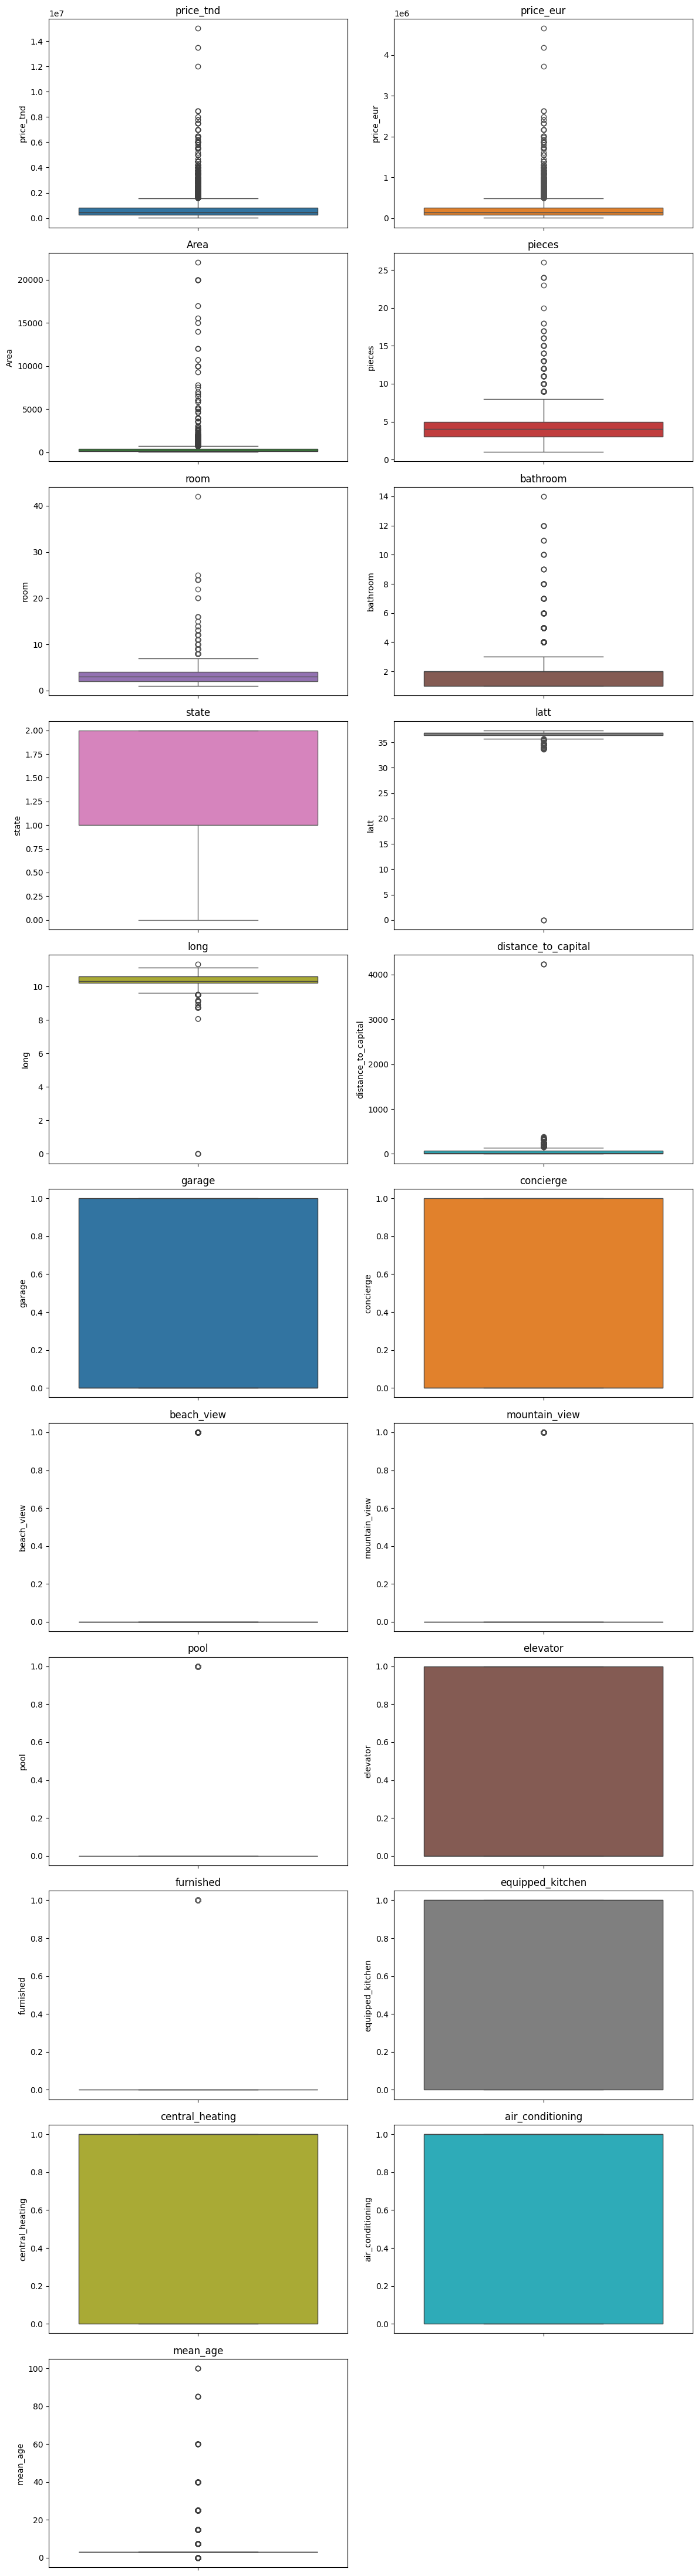

In [25]:
# checking numerical columns for outliers using boxplot
n_rows = int(np.ceil(len(numerical_cols) / 2))
n_cols = 2
colors = sns.color_palette("tab10", len(numerical_cols))
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color=colors[i])
    axes[i].set_title(col)
    
for j in range(len(numerical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Interpretations 1:
- price_eur, price_tnd, area, pieces, room and bathroom have large number of records considered as outliers using IQR formula (box plot), but changing all these records can cause huge loss of information from data
- latt, long and distance_to_capital are ideal for dealing with outlier values

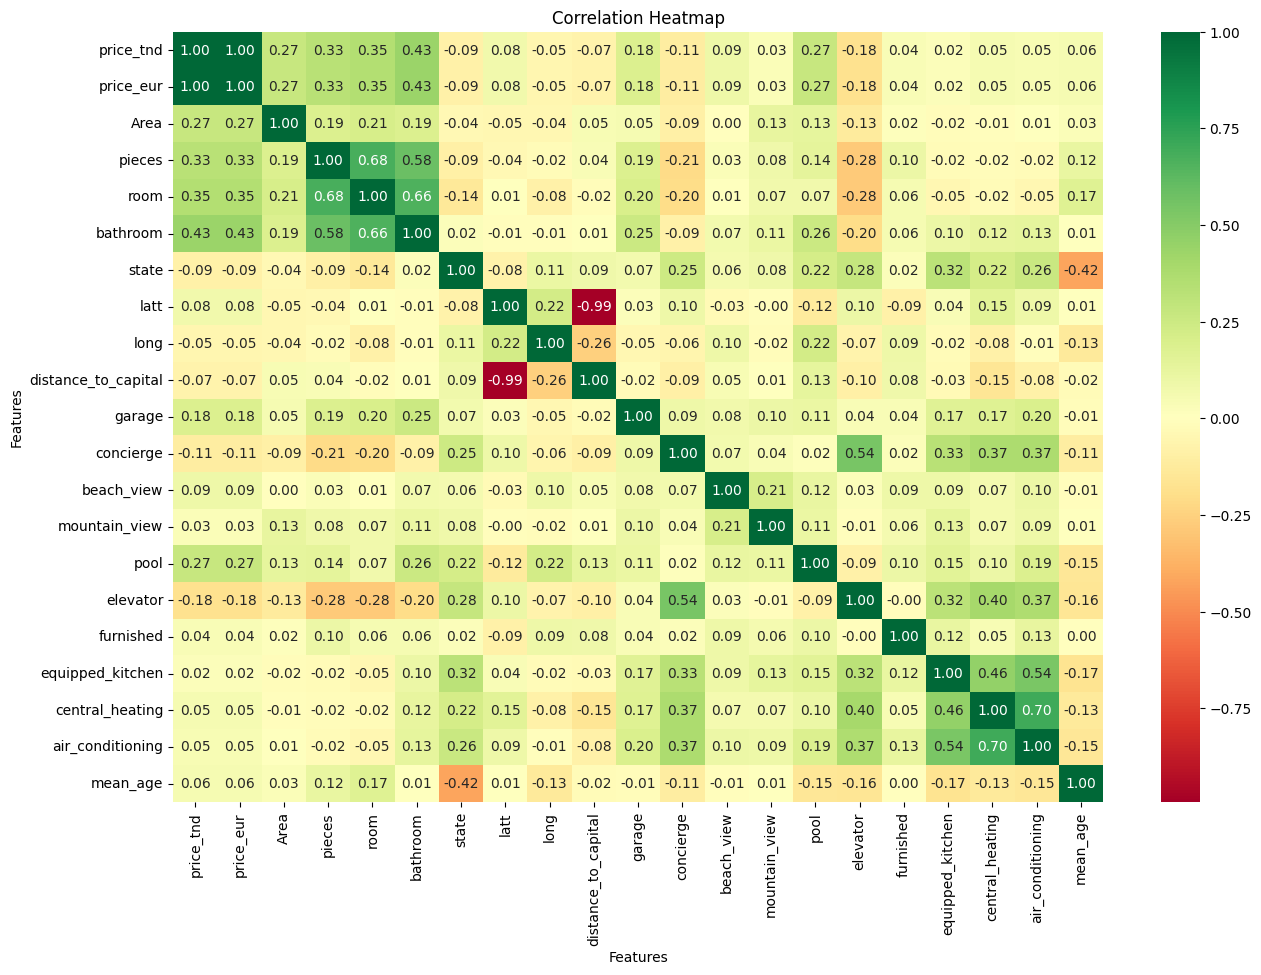

In [26]:
# test for correlation between numerical columns
plt.figure(figsize=(15, 10))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

### Interpretation 2:
- price_eur and price_tnd, central_heating and air_conditioning, room with bathroom, and room with pieces are highly correlated
- distance_to_capital and latt are inversely correlated

In [27]:
# price_tnd and price_eur are correlated
df.drop('price_tnd', axis=1, inplace=True)
# latt is inversely correlated to distance_to_capital
df.drop('latt', axis=1, inplace=True)
# room is correlated to pieces and bathroom are 
df.drop('bathroom', axis=1, inplace=True)
df.drop('pieces', axis=1, inplace=True)
# air_conditioning and central_heating are correlated
df.drop('air_conditioning', axis=1, inplace=True)
numerical_cols.remove('price_tnd')
numerical_cols.remove('latt')
numerical_cols.remove('bathroom')
numerical_cols.remove('pieces')
numerical_cols.remove('air_conditioning')

In [28]:
print("categorical columns:", categorical_cols)
print("numerical columns:", numerical_cols)

categorical columns: ['location', 'city', 'governorate']
numerical columns: ['price_eur', 'Area', 'room', 'state', 'long', 'distance_to_capital', 'garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator', 'furnished', 'equipped_kitchen', 'central_heating', 'mean_age']


In [29]:
# test for correlation between categorical columns
from scipy.stats import chi2_contingency

results = []

# Iterate over all combinations of categorical columns
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        cat_col1 = categorical_cols[i]
        cat_col2 = categorical_cols[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])
        
        # Perform the Chi-Square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Store the results
        result = {
            "categorical_1": cat_col1,
            "categorical_2": cat_col2,
            "chi2": chi2,
            "p_value": p_value,
            "degrees_of_freedom": dof
        }
        results.append(result)

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

  categorical_1 categorical_2      chi2  p_value  degrees_of_freedom
0      location          city 369344.31     0.00               20636
1      location   governorate  81001.08     0.00                4928
2          city   governorate  82042.92     0.00                1072


In [30]:
# city, location and governorate are highly correlated (p < 0.05)
df.drop(['city', 'governorate'], axis=1, inplace=True)
categorical_cols.remove('city')
categorical_cols.remove('governorate')

In [31]:
# test for correlation between categorical and numerical columns
from scipy.stats import f_oneway

results = []

# Iterate over all combinations of categorical and numerical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        
        # Perform ANOVA
        groups = [df[num_col][df[cat_col] == cat] for cat in df[cat_col].unique()]
        f_statistic, p_value = f_oneway(*groups)
        
        result = {
            "categorical": cat_col,
            "numerical": num_col,
            "F-statistic": f_statistic,
            "p_value": p_value
        }
        results.append(result)

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)
print(results_df)

   categorical            numerical  F-statistic  p_value
0     location            price_eur         6.29     0.00
1     location                 Area        10.57     0.00
2     location                 room         4.28     0.00
3     location                state         5.18     0.00
4     location                 long        33.03     0.00
5     location  distance_to_capital        24.33     0.00
6     location               garage         2.08     0.00
7     location            concierge         3.98     0.00
8     location           beach_view         3.73     0.00
9     location        mountain_view         3.14     0.00
10    location                 pool         6.42     0.00
11    location             elevator         6.21     0.00
12    location            furnished         2.02     0.00
13    location     equipped_kitchen         3.70     0.00
14    location      central_heating         4.92     0.00
15    location             mean_age         8.61     0.00


In [32]:
# Remove location as it is highly correlated to all numerical columns
df.drop('location', axis=1, inplace=True)

In [33]:
display_dataframe_shape(df)
df.drop_duplicates(inplace=True)
display_dataframe_shape(df)

There are 5688 rows and 16 columns in the data set
There are 5671 rows and 16 columns in the data set


In [34]:
# Storing original dataframe before outlier removal
original_df = df.copy(deep=True)

In [35]:
# Function to replace outliers with the median
def replace_outliers_with_median(column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bound for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the median
    median = column.median()
    
    # Replace outliers with the median
    return column.apply(lambda x: median if x < lower_bound or x > upper_bound else x)

outlier_cols = set(numerical_cols).difference(['garage', 'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator',
                                               'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning',
                                               'mean_age'])

df[list(outlier_cols)] = df[list(outlier_cols)].apply(replace_outliers_with_median)
df.head()

,price_eur,Area,room,state,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,mean_age
1,139500.00,170.00,3.00,1.00,10.58,108.79,1,1,1,0,0,1,1,1,1,40.00
2,139500.00,170.00,3.00,1.00,10.63,118.32,0,0,0,0,0,0,1,1,1,3.00
3,139500.00,170.00,3.00,1.00,10.63,118.32,0,0,0,0,0,0,1,1,1,3.00
5,310000.00,170.00,3.00,2.00,10.63,119.60,1,0,0,0,0,0,0,0,0,3.00
8,139500.00,170.00,5.00,1.00,10.60,113.68,0,0,0,0,1,0,0,1,1,3.00


In [36]:
# Storing preprocessed dataframe before ML processing
df.drop_duplicates(inplace=True)
display_dataframe_shape(df)
preprocessed_df = df.copy(deep=True)

There are 5651 rows and 16 columns in the data set


## **Regression**
####  Implement any of the ML Classification algorithms.
(Linear Regression/KNN/Locally weighted regression/ any of the regularization
techniques)

**Solution: Predicting Price using Linear Regression**

#### **1. Perform and explain necessary pre-processing / feature engineering**

Data Pre-processing & feature engineering steps are already performed above.

In [37]:
df = preprocessed_df.copy(deep=True)

In [38]:
# Importing librarires for Regression task

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [39]:
# Basic variables initialise

target = 'price_eur'
features = [i for i in df.columns if i not in [target]]

display_dataframe_shape(df)

There are 5651 rows and 16 columns in the data set


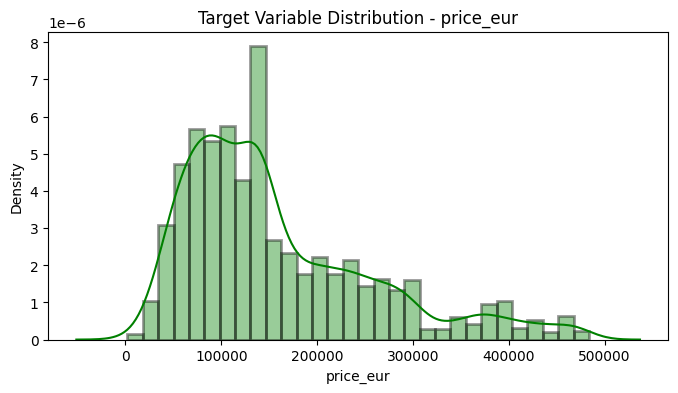

In [40]:
# Analysing the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='green', hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - price_eur')
plt.show()


Numeric Features Distribution:


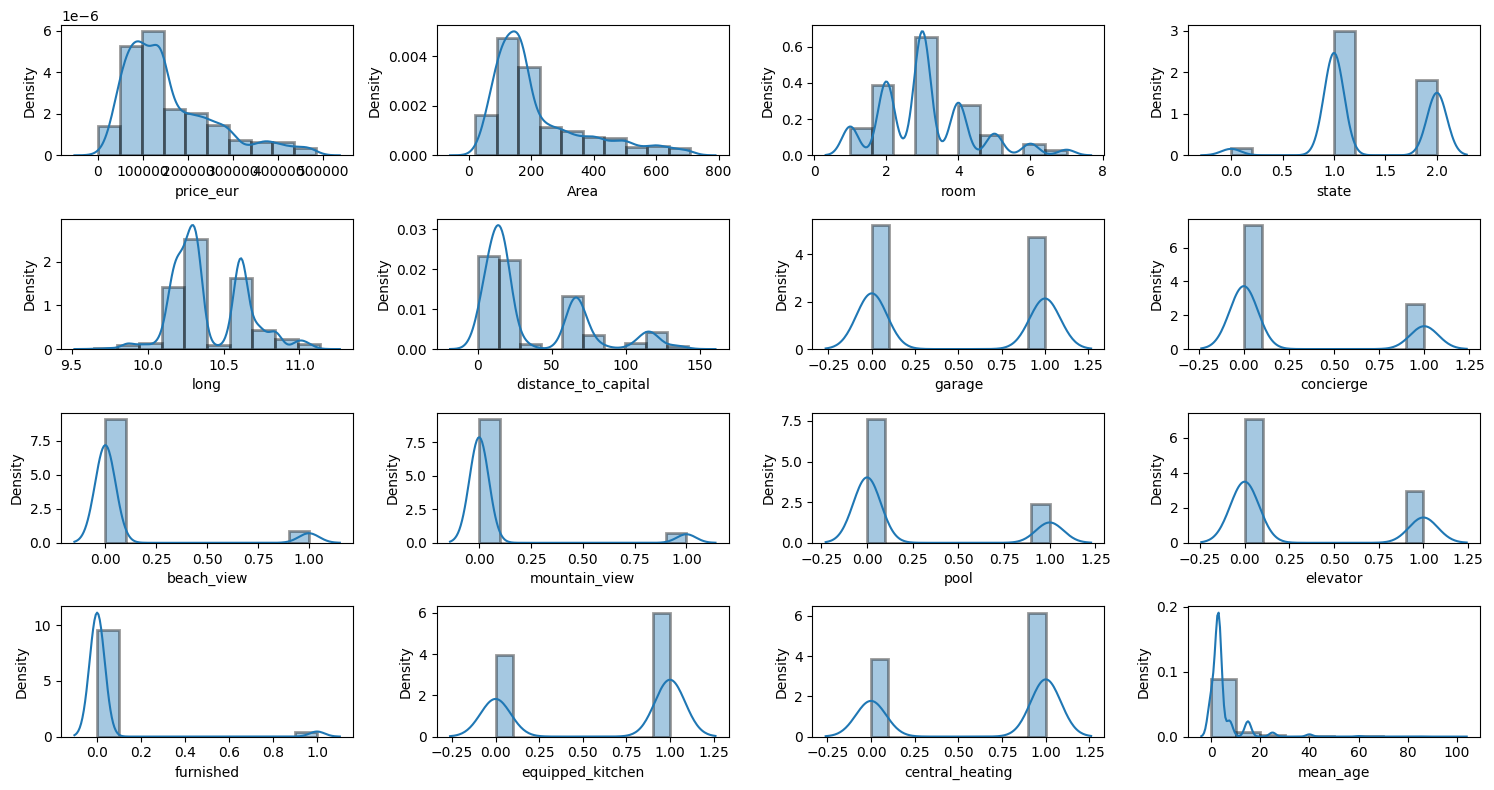

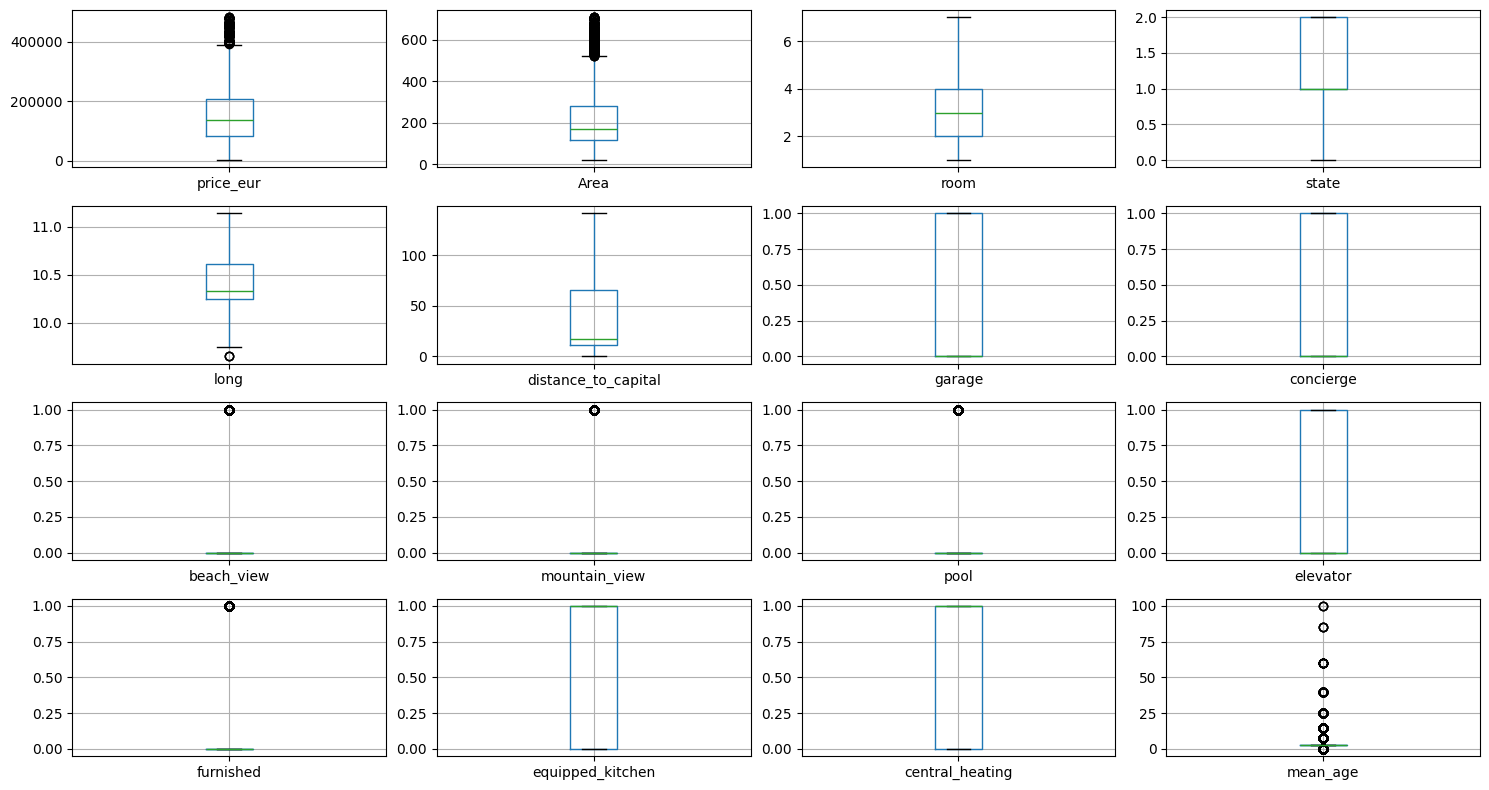

In [41]:
# Visualising the Numeric features 

print('Numeric Features Distribution:')

plt.figure(figsize=[15, 8])
for i in range(len(numerical_cols)):
    plt.subplot(4,4,i+1)
    sns.distplot(df[numerical_cols[i]], hist_kws=dict(edgecolor="black", linewidth=2), bins=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 8])
for i in range(len(numerical_cols)):
    plt.subplot(4,4,i+1)
    df.boxplot(numerical_cols[i])
plt.tight_layout()
plt.show()

#### **2. Machine Learning Activity**

**Model Selection (Linear Regression):** Linear Regression model can be used on continuous numeric data based on the input features. We have experimented with other Regression variants like Ridge, Lasso, Elastic-Net and Polynomial to evaluate the performance.

In [42]:
# Split data into features (X) and target variable (y)
X = df.drop([target], axis=1)
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=100)

# Converting the sets into dataframe format
Train_X_std = pd.DataFrame(X_train, columns=X.columns)
Test_X_std = pd.DataFrame(X_test, columns=X.columns)
Train_Y = y_train
Test_Y = y_test

print('Original set  ---> ', X.shape, y.shape)
print('Training set  ---> ', X_train.shape, y_train.shape)
print('Testing set   ---> ', X_test.shape, y_test.shape)

display(Train_X_std.describe())
display(Test_X_std.describe())

Original set  --->  (5651, 15) (5651,)
Training set  --->  (4520, 15) (4520,)
Testing set   --->  (1131, 15) (1131,)


,Area,room,state,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,mean_age
count,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00
mean,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.00,0.01,0.01,0.00,0.00,0.00,-0.01,0.00
std,0.99,1.00,1.01,1.00,0.99,1.00,1.00,1.00,1.01,1.01,1.00,1.01,1.00,1.00,1.02
min,-1.32,-1.62,-2.44,-3.15,-1.02,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.66
25%,-0.68,-0.84,-0.60,-0.68,-0.70,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.25
50%,-0.33,-0.05,-0.60,-0.32,-0.52,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,0.81,0.79,-0.25
75%,0.34,0.73,1.24,0.88,0.84,1.05,1.66,-0.31,-0.28,-0.56,1.55,-0.20,0.81,0.79,-0.25
max,3.26,3.08,1.24,3.06,3.00,1.05,1.66,3.20,3.51,1.79,1.55,4.96,0.81,0.79,12.85


,Area,room,state,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,mean_age
count,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00
mean,0.06,0.03,-0.01,0.02,0.03,0.06,-0.02,0.00,-0.03,-0.04,-0.02,-0.01,-0.01,0.03,-0.00
std,1.04,1.00,0.97,1.01,1.04,1.00,0.99,1.01,0.95,0.97,0.99,0.96,1.00,0.99,0.93
min,-1.24,-1.62,-2.44,-3.15,-0.99,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.66
25%,-0.66,-0.84,-0.60,-0.63,-0.70,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.25
50%,-0.33,-0.05,-0.60,-0.32,-0.52,1.05,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,0.81,0.79,-0.25
75%,0.54,0.73,1.24,0.88,0.84,1.05,1.66,-0.31,-0.28,-0.56,1.55,-0.20,0.81,0.79,-0.25
max,3.26,3.08,1.24,2.78,2.83,1.05,1.66,3.20,3.51,1.79,1.55,4.96,0.81,0.79,7.44


In [43]:
# Model Evaluation functions:

model_evaluation_matrix = pd.DataFrame(
    np.zeros([5, 8]),
    columns=['Train-MAE', 'Test-MAE',
            'Train-MSE', 'Test-MSE',
            'Train-RMSE', 'Test-RMSE',
            'Train-R2', 'Test-R2']
)

# Randomly pick a column name from dataset Train_X_std which has >= 50 unique values
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)

def model_evaluation(degree, pred1, pred2):
    # Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.title('Train set: Actual vs Prediction results')
        plt.legend()
    plt.show()

    # Evaluate the model
    model_evaluation_matrix.loc[degree, 'Train-MAE']= mean_absolute_error(Train_Y, pred1)
    model_evaluation_matrix.loc[degree, 'Test-MAE'] = mean_absolute_error(Test_Y, pred2)
    model_evaluation_matrix.loc[degree, 'Train-MSE']= mean_squared_error(Train_Y, pred1)
    model_evaluation_matrix.loc[degree, 'Test-MSE'] = mean_squared_error(Test_Y, pred2)
    model_evaluation_matrix.loc[degree, 'Train-RMSE']= mean_squared_error(Train_Y, pred1, squared=False)
    model_evaluation_matrix.loc[degree, 'Test-RMSE'] = mean_squared_error(Test_Y, pred2, squared=False)
    model_evaluation_matrix.loc[degree, 'Train-R2']= r2_score(Train_Y, pred1)
    model_evaluation_matrix.loc[degree, 'Test-R2'] = r2_score(Test_Y, pred2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15, 10])

    plt.subplot(2,2,1)
    # Calculate residuals
    residuals = Train_Y - pred1
    sns.histplot(residuals, bins=20, kde=True)
    plt.title('Train set: Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.subplot(2,2,2)
    # Calculate residuals
    residuals = Test_Y - pred2
    sns.histplot(residuals, bins=20, kde=True)
    plt.title('Distribution of Residuals - from Test set')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')

    plt.subplot(2,2,3)
    plt.scatter(Train_Y, pred1, color='blue')
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], linestyle='--', color='red', linewidth=2)
    plt.title('Predicted vs Actual Price - from Train set')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')

    plt.subplot(2,2,4)
    plt.scatter(Test_Y, pred2, color='blue')
    plt.plot([Test_Y.min(),Test_Y.max()],[Test_Y.min(),Test_Y.max()], linestyle='--', color='red', linewidth=2)
    plt.title('Predicted vs Actual Price - from Test set')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()

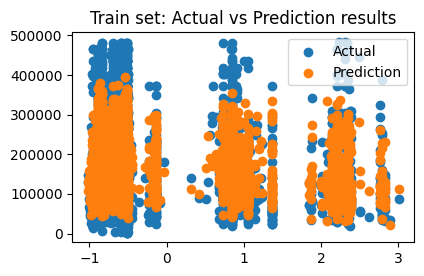

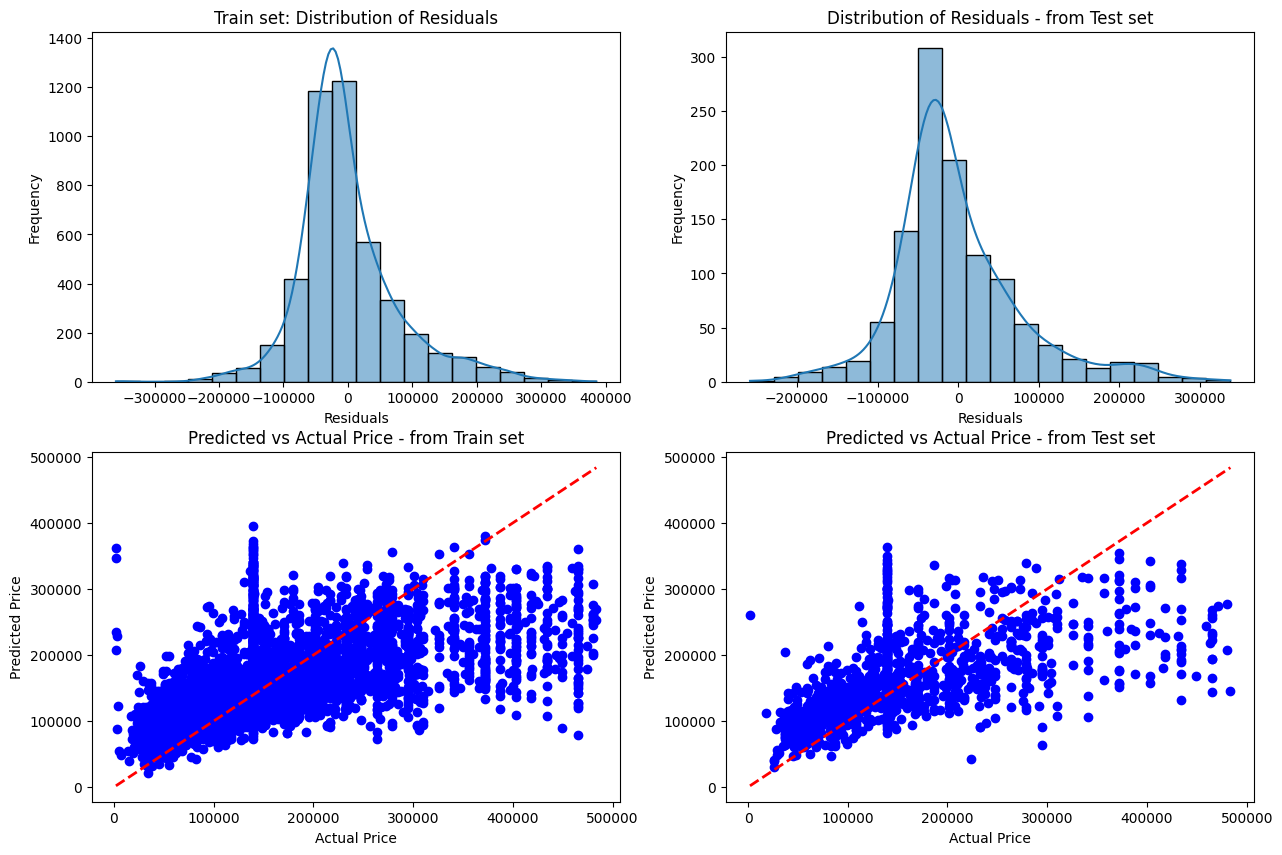

In [44]:
# Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

model_evaluation(0, pred1, pred2)

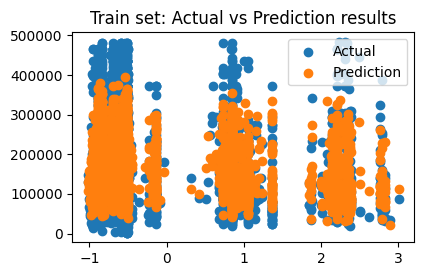

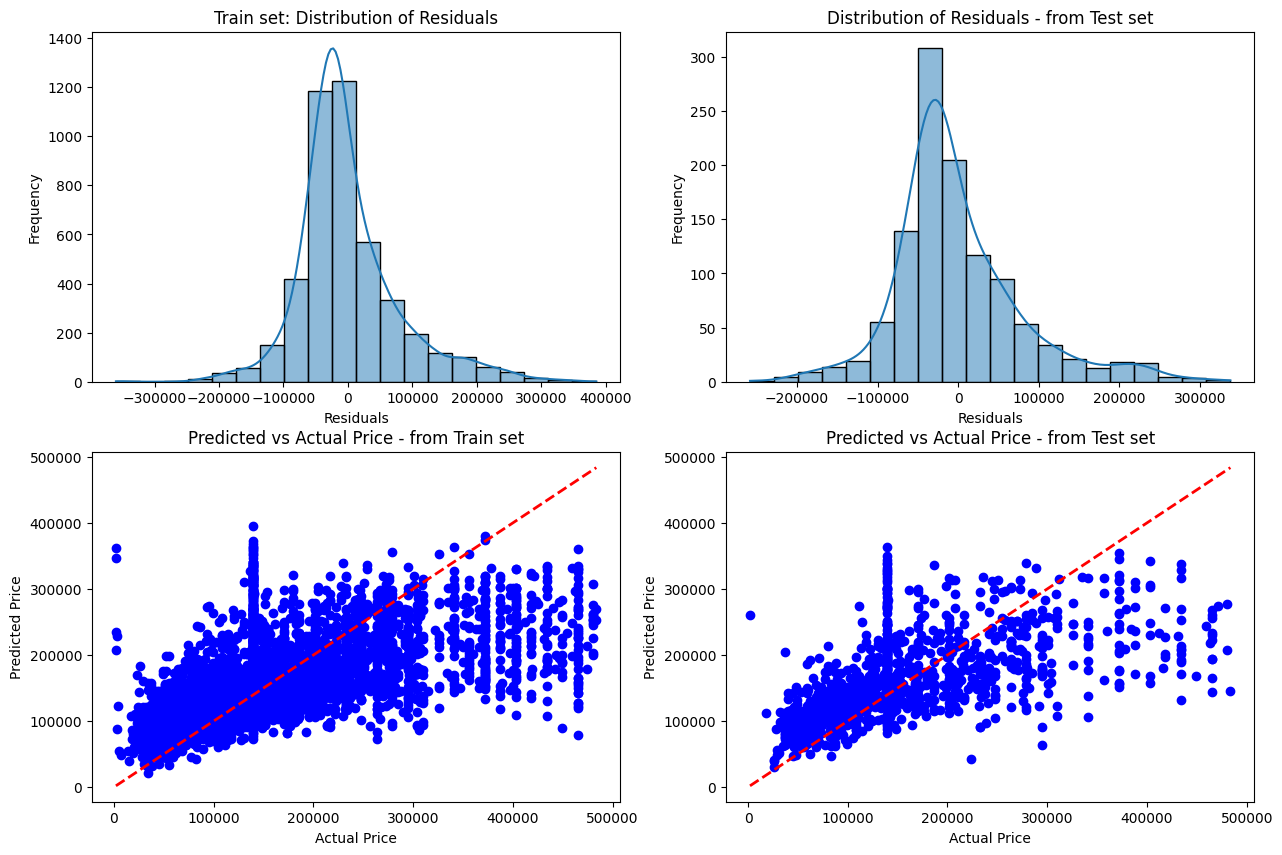

In [45]:
# Lasso Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

model_evaluation(2, pred1, pred2)

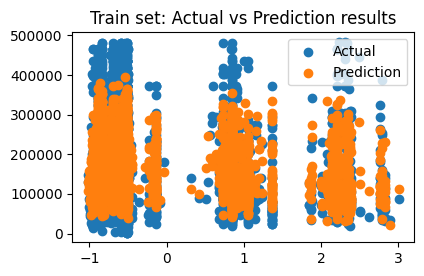

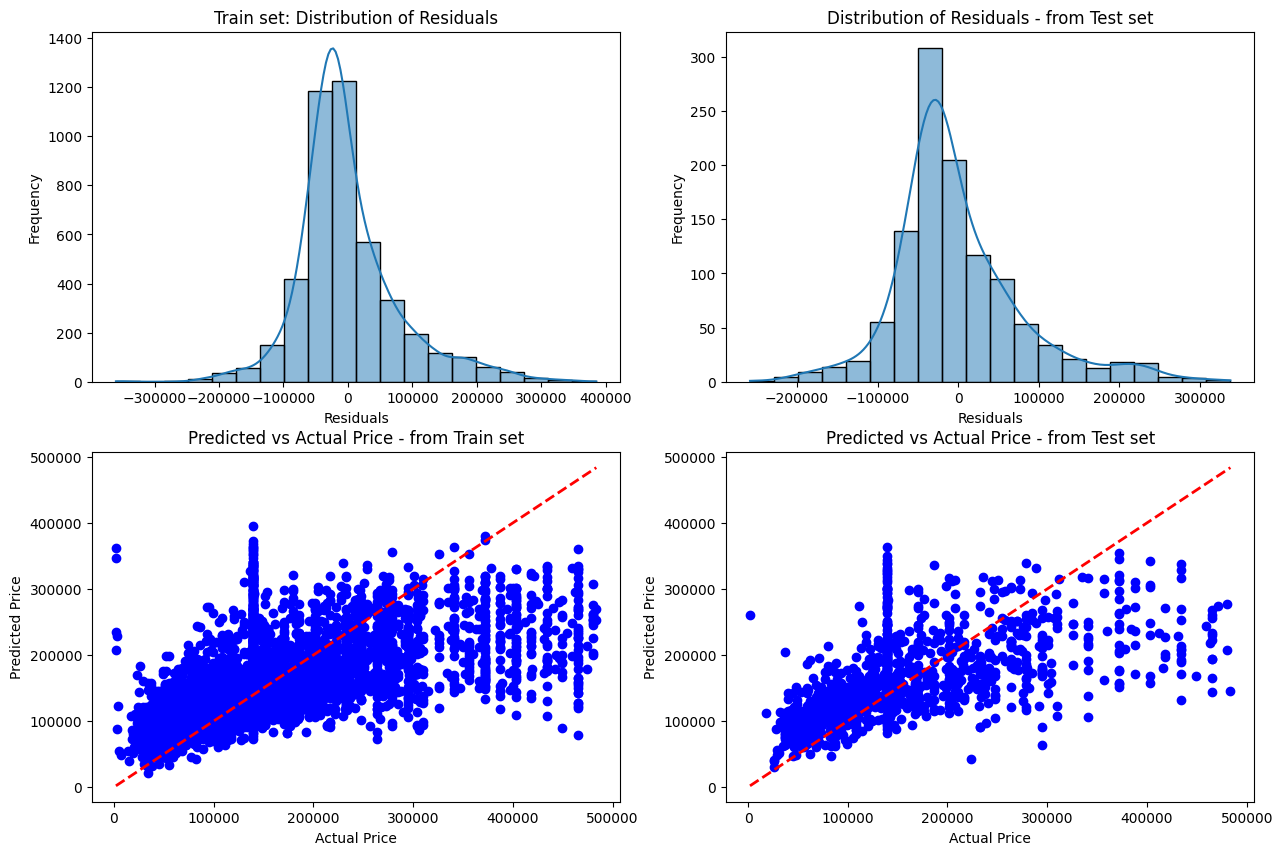

In [46]:
# Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

model_evaluation(1, pred1, pred2)

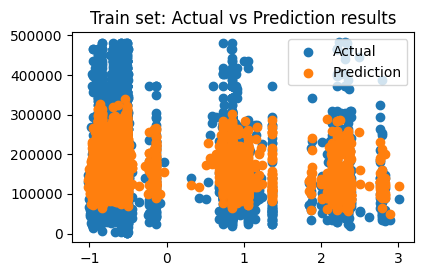

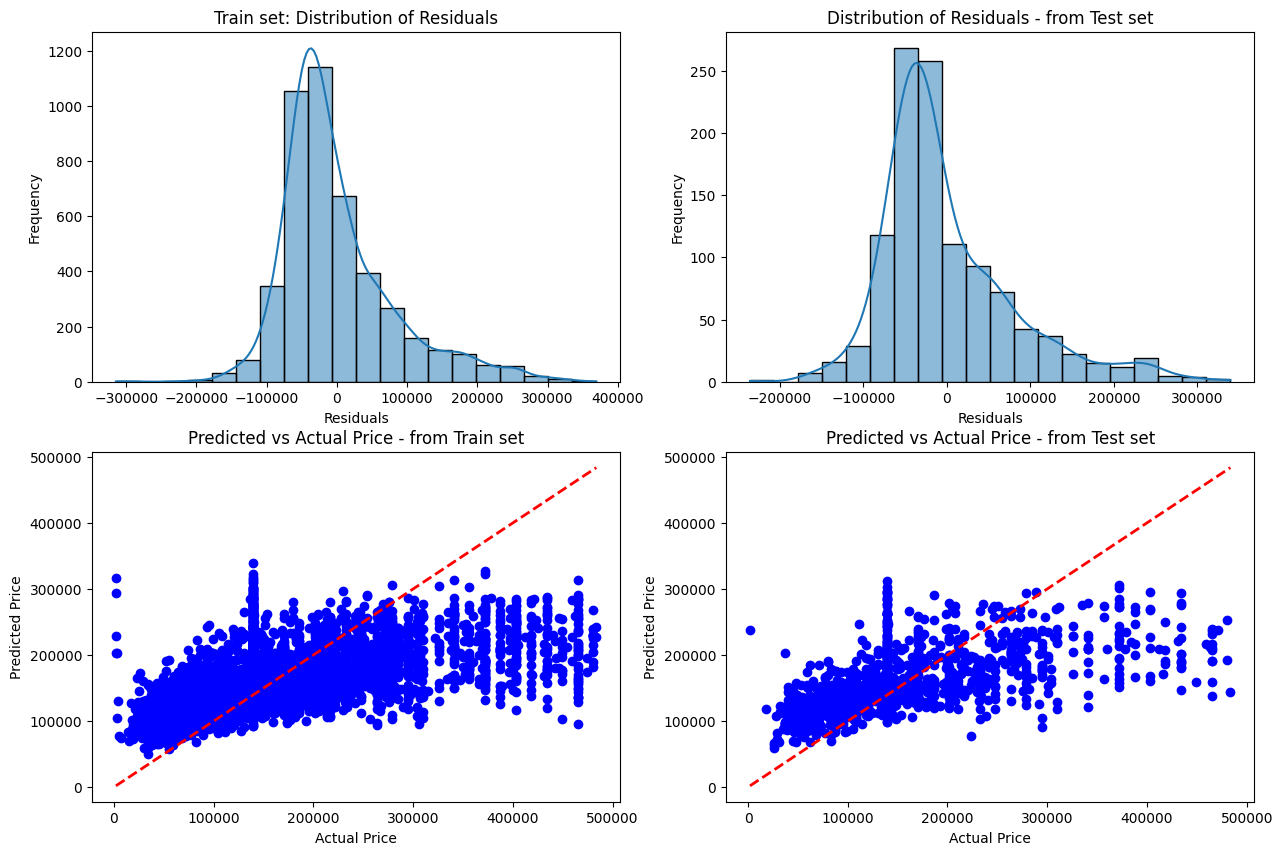

In [47]:
# Elastic-Net Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

model_evaluation(3, pred1, pred2)

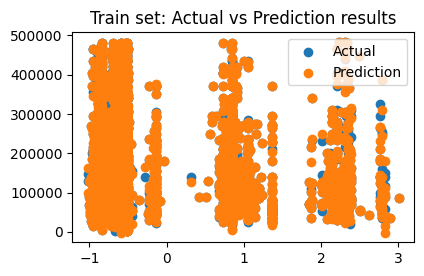

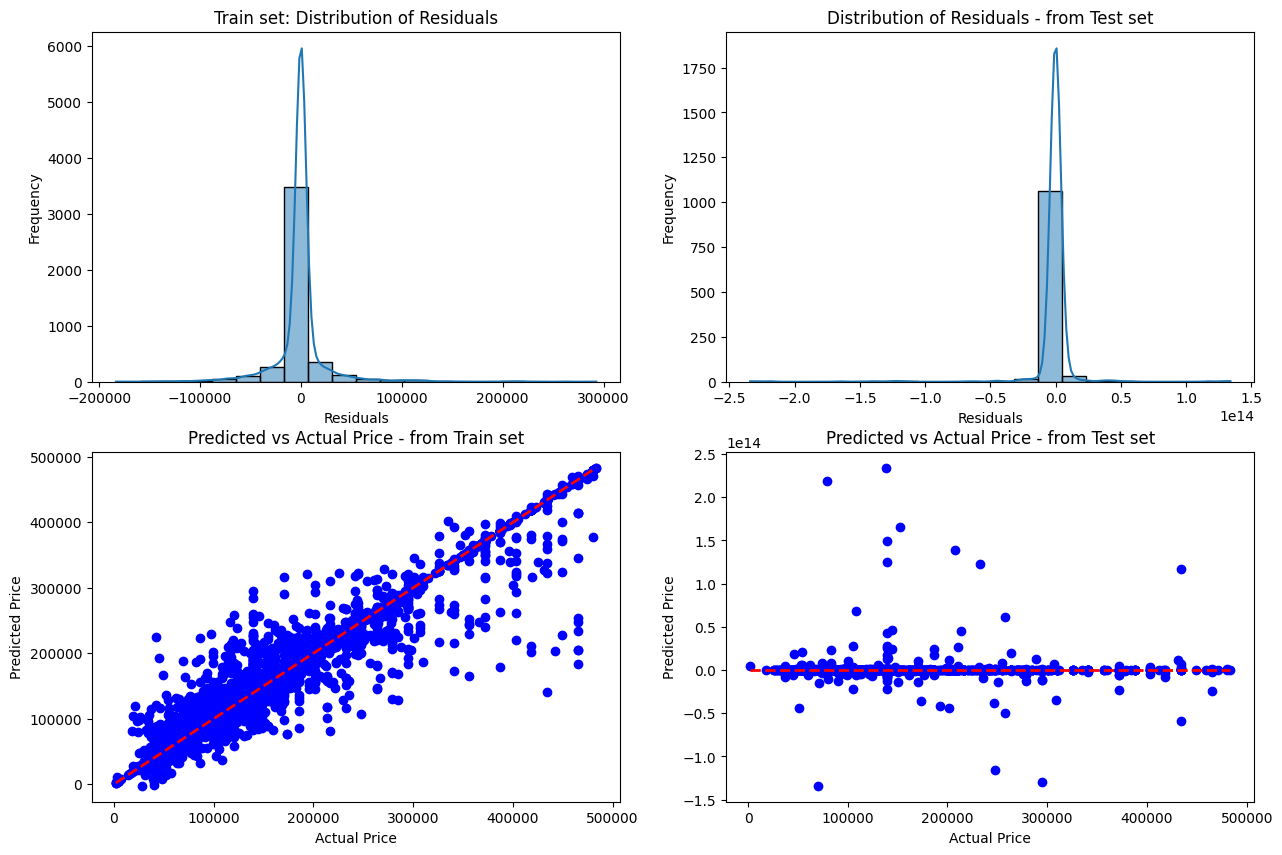

In [48]:
# 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_train_poly = poly_reg.fit_transform(Train_X_std)
X_test_poly = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_train_poly, Train_Y)

pred1 = PR.predict(X_train_poly)
pred2 = PR.predict(X_test_poly)

model_evaluation(4, pred1, pred2)

#### **3. Model Evaluation**


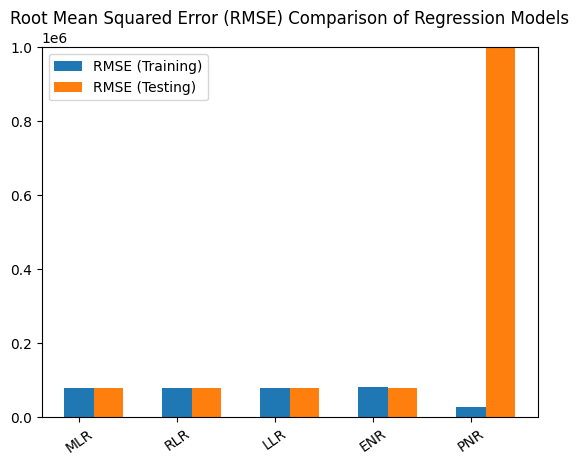

,Train-MAE,Test-MAE,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE,Train-R2,Test-R2
MLR,56363.52,57481.54,6164066982.58,6238258792.11,78511.57,78982.65,0.39,0.36
RLR,56364.78,57482.35,6164067084.04,6238159521.05,78511.57,78982.02,0.39,0.36
LLR,56363.74,57481.80,6164066997.57,6238263485.30,78511.57,78982.68,0.39,0.36
ENR,59448.73,59681.64,6392678832.77,6335275628.16,79954.23,79594.44,0.36,0.35
PNR,10661.16,2879678021761.78,715861176.44,271684285960829617943085056.00,26755.58,16482848235691.23,0.93,-27944332696062124.00


In [49]:
# Model Evaluation:

# Root Mean Squared Error Comparison for different Regression Models
model_evaluation_matrix.index = ['MLR', 'RLR', 'LLR', 'ENR', 'PNR']
plt.bar(np.arange(5), model_evaluation_matrix['Train-RMSE'].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, model_evaluation_matrix['Test-RMSE'].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5), model_evaluation_matrix.index, rotation=35)
plt.title('Root Mean Squared Error (RMSE) Comparison of Regression Models')
plt.legend()
# limiting y-axis to avoid stripping of other bars due to extremes
plt.ylim([0, 1.00e6])
plt.show()

model_evaluation_matrix

#### **4. Observation and Conclusion**

- Analysed Linear, Lasso, Ridge, Elastic-Net and Polynomial models.
- Provided the model should have close proximity with the training & testing scores, polynomial regressions clearly overfits the model.
- From `model_evaluation_matrix` test results, except Polynomial Regression model all other models performance are almost similar.
- Considering the complexities of models, Linear Regression model can be selected over Regression models.

## **Classification**
####  Implement any of the ML Classification algorithms.
(Logistic Regression / SVM / Decision Tree/ Naive Bayes/KNN/ANN)

**Solution: Predicting Price using Decision Tree Classifier**

#### **1. Perform and explain necessary pre-processing / feature engineering**

In [50]:
df = preprocessed_df.copy(deep=True)

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [52]:
X = df.drop(['price_eur'], axis=1)
y = df[['price_eur']]

# For classification, we divide the numerical target price into 4 bins (using quantiles)
y['labels'] = pd.cut(y['price_eur'], bins=3, include_lowest=True, precision=1, labels=False)
y.groupby('labels')['price_eur'].agg(['count','mean','min','max'])

,count,mean,min,max
labels,,,,
0,3685,98190.75,2015.00,162130.00
1,1494,229641.59,162750.00,322400.00
2,472,398363.83,325500.00,483600.00


<Axes: xlabel='labels', ylabel='Count'>

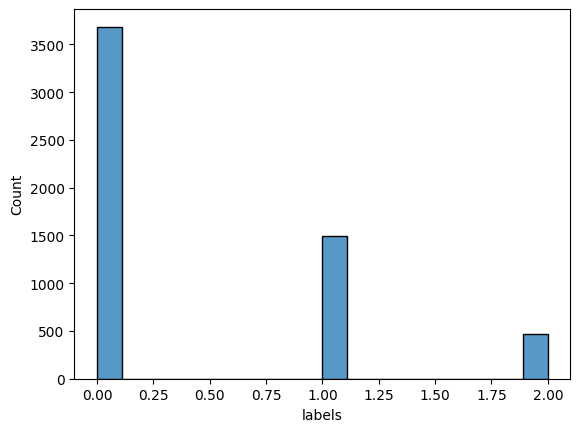

In [53]:
# Price distribution in each bin
sns.histplot(y['labels'])

#### **2. Machine Learning Activity**

In [54]:
# Standardization and splitting the train and test set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y['labels'], test_size=0.2, random_state=42)

In [55]:
# Model fitting and predictions
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       717
           1       0.56      0.54      0.55       324
           2       0.38      0.43      0.41        90

    accuracy                           0.70      1131
   macro avg       0.58      0.60      0.59      1131
weighted avg       0.71      0.70      0.70      1131



In [56]:
# Hyperparameter tuning
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [10, 50, 70, 100],
    "min_samples_split": [5, 10, 50, 100],
    "min_samples_leaf": [5, 10, 15, 30],
    "class_weight": [None, "balanced"],
}
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=3,
    scoring="precision_macro",
    verbose=1,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 50}


#### **3. Model Evaluation**

In [57]:
# Evaluation with best parameters
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       717
           1       0.65      0.61      0.63       324
           2       0.48      0.40      0.44        90

    accuracy                           0.76      1131
   macro avg       0.65      0.63      0.64      1131
weighted avg       0.75      0.76      0.76      1131



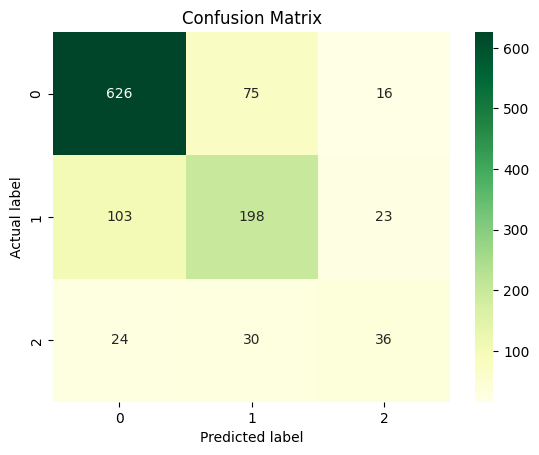

In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="YlGn",
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.show()

#### **4. Observation and Conclusion**

- Default parameters of Decision Tree classifier gets us 71% accuracy and 60% f1-score.
- By hyperparameter tuning and cross validation, we can improve the classifier performance to 76% accuracy and 64% f1-score.
- Classification to predict price of house (using bins) is acceptable in performance but not ideal due to loss of information.

## **Ensemble ML**


#### **1. Perform and explain necessary pre-processing / feature engineering**

In [59]:
# Basic variables initialise

df = preprocessed_df.copy(deep=True)

#### **2. Machine Learning Activity**

In [60]:
# Split data into features (X) and target variable (y)
X = df.drop([target], axis=1)
y = df[target]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, test_size=0.2, random_state=42)

# Converting the sets into dataframe format
Train_X_std = pd.DataFrame(X_train, columns=X.columns)
Test_X_std = pd.DataFrame(X_test, columns=X.columns)
Train_Y = y_train
Test_Y = y_test

print('Original set  ---> ', X.shape, y.shape)
print('Training set  ---> ', X_train.shape, y_train.shape)
print('Testing set   ---> ', X_test.shape, y_test.shape)

display(Train_X_std.describe())
display(Test_X_std.describe())

Original set  --->  (5651, 15) (5651,)
Training set  --->  (4520, 15) (4520,)
Testing set   --->  (1131, 15) (1131,)


,Area,room,state,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,mean_age
count,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00,4520.00
mean,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.01,0.01,-0.01,-0.00,0.00,-0.01,-0.01,0.00
std,1.00,0.99,1.00,1.00,1.00,1.00,1.00,1.01,1.01,0.99,1.00,1.01,1.00,1.00,0.98
min,-1.32,-1.62,-2.44,-3.15,-1.02,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.66
25%,-0.68,-0.84,-0.60,-0.74,-0.70,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.25
50%,-0.33,-0.05,-0.60,-0.32,-0.52,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,0.81,0.79,-0.25
75%,0.40,0.73,1.24,0.88,0.84,1.05,1.66,-0.31,-0.28,-0.56,1.55,-0.20,0.81,0.79,-0.25
max,3.26,3.08,1.24,2.78,2.83,1.05,1.66,3.20,3.51,1.79,1.55,4.96,0.81,0.79,12.85


,Area,room,state,long,distance_to_capital,garage,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,mean_age
count,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00,1131.00
mean,0.03,0.05,0.06,0.03,0.01,0.05,0.03,-0.04,-0.03,0.04,0.02,-0.01,0.04,0.03,-0.00
std,1.00,1.03,1.02,1.02,1.01,1.00,1.02,0.95,0.94,1.02,1.01,0.96,0.99,0.99,1.07
min,-1.24,-1.62,-2.44,-3.15,-1.01,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.66
25%,-0.66,-0.84,-0.60,-0.63,-0.69,-0.95,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,-1.23,-1.27,-0.25
50%,-0.33,-0.05,-0.60,-0.32,-0.52,1.05,-0.60,-0.31,-0.28,-0.56,-0.64,-0.20,0.81,0.79,-0.25
75%,0.40,0.73,1.24,0.88,0.84,1.05,1.66,-0.31,-0.28,1.79,1.55,-0.20,0.81,0.79,-0.25
max,3.19,3.08,1.24,3.06,3.00,1.05,1.66,3.20,3.51,1.79,1.55,4.96,0.81,0.79,12.85


In [61]:
#To store model scores
#Initialize empty list to store model's performance score

mae_scores = []
mse_scores = []
rmse_scores = []
r2_scores = []

#Fitting the model
def fit_predict(model):
    model.fit(Train_X_std, y_train)
    y_pred = model.predict(Test_X_std)
    return y_pred

#Calculate mean absolute error, mean sqaured error, root mean squared error and r2 score
def evaluation(y_pred):
    return mean_absolute_error(Test_Y,y_pred), mean_squared_error(Test_Y, y_pred), mean_squared_error(Test_Y, y_pred, squared= False), r2_score(Test_Y, y_pred)


In [62]:
#Model1 : Linear regression
linear_regression = LinearRegression()
y_pred_lr = fit_predict(linear_regression)


#Model2 : Lasso Regression
lasso_regression = Lasso()
y_predict_lasso = fit_predict(lasso_regression)


#Model3 : Elastic-Net Regression
Elasticnet_regression = ElasticNet()
y_predict_elastic = fit_predict(Elasticnet_regression)


#Model4 : Ridge Regression
Ridge_regression = Ridge()
y_predict_ridge = fit_predict(Ridge_regression)


In [63]:
#Individual model Evaluation
#Function to store mean absolute error, mean sqaure erro, root mean sqaure error and r2 score of all the models

def append_list(mae, mse, rmse, r2s):
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2s)

    return mae_scores, mse_scores, rmse_scores, r2_scores

#Calculating the model score for LinearRegression
mae, mse, rmse, r2s = evaluation(y_pred_lr)
print(f"Mean absolute error of Linear Regression = {mae} \nMean square error of Linear regression = {mse} \nRoot Mean square error of Linear regression = {rmse}\nR2 score of Linear regression = {r2s}\n")
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)


#Calculating the model score for LassoRegression
mae, mse, rmse, r2s = evaluation(y_predict_lasso)
print(f"Mean absolute error of Lasso Regression = {mae} \nMean square error of Lasso Regression = {mse} \nRoot Mean square error of Lasso Regression = {rmse}\nR2 score of Lasso regression = {r2s}\n")
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)


#Calculating the model score for ElasticnetRegression
mae, mse, rmse, r2s = evaluation(y_predict_elastic)
print(f"Mean absolute error of Elastic-Net Regression = {mae} \nMean square error of Elastic-Net Regression = {mse} \nRoot Mean square error of Elastic-Net Regression = {rmse}\nR2 score of Elastic-net regression = {r2s}\n")
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)


#Calculating the model score for RidgeRegression
mae, mse, rmse, r2s = evaluation(y_predict_ridge)
print(f"Mean absolute error of Ridge Regression = {mae} \nMean square error of Ridge Regression = {mse} \nRoot Mean square error of Ridge Regression = {rmse}\nR2 score of Ridge regression = {r2s}\n")
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)


#Score Evaluation in table format
score = {
    'mae_score': mae_scores,
    'mse_score': mse_scores,
    'rmse_score': rmse_scores,
    'r2_score' : r2_scores,
}

#table to print all the scores
model_score = pd.DataFrame(score, index=['Linear Regression', 'Lasso Regression', 'Elasticnet Regression', 'Ridge Regression'])
print("\n\tScores of all the models in table")
display(model_score)


Mean absolute error of Linear Regression = 55137.644297640436 
Mean square error of Linear regression = 5652740597.6081705 
Root Mean square error of Linear regression = 75184.70986582425
R2 score of Linear regression = 0.4176256281185913

Mean absolute error of Lasso Regression = 55137.80295215854 
Mean square error of Lasso Regression = 5652734764.379506 
Root Mean square error of Lasso Regression = 75184.67107316162
R2 score of Lasso regression = 0.4176262290877708

Mean absolute error of Elastic-Net Regression = 58261.156768849396 
Mean square error of Elastic-Net Regression = 5938575388.1739235 
Root Mean square error of Elastic-Net Regression = 77062.1527610923
R2 score of Elastic-net regression = 0.388177459793298

Mean absolute error of Ridge Regression = 55138.992411289844 
Mean square error of Ridge Regression = 5652785450.955786 
Root Mean square error of Ridge Regression = 75185.00815292758
R2 score of Ridge regression = 0.417621007096329


	Scores of all the models in tabl

,mae_score,mse_score,rmse_score,r2_score
Linear Regression,55137.64,5652740597.61,75184.71,0.42
Lasso Regression,55137.80,5652734764.38,75184.67,0.42
Elasticnet Regression,58261.16,5938575388.17,77062.15,0.39
Ridge Regression,55138.99,5652785450.96,75185.01,0.42


In [64]:
#Bagging estimator

from sklearn.ensemble import BaggingRegressor

def bagging_prediction(estimator):

    #train the model using bagging regressor
    Bagging_regressor = BaggingRegressor(estimator,
                                n_estimators=10,
                                max_samples=1.0,
                                bootstrap=True, # Samples are drawn with replacement
                                n_jobs= -1,
                                random_state=42).fit(Train_X_std, Train_Y)
    
    y_predict_br = Bagging_regressor.predict(Test_X_std)

    #calculating the model score for individual estimator
    mae, mse, rmse, r2s = evaluation(y_predict_br)
    print(f"Mean absolute error of {estimator} = {mae} \nMean square error of {estimator} = {mse} \nRoot Mean square error of {estimator} = {rmse}\nR2 score of {estimator} = {r2s}\n")
    return y_predict_br

In [65]:
#Bagging Evaluation

#training the model with different regressor algorithms
predictions = np.column_stack((bagging_prediction(linear_regression),
                              bagging_prediction(lasso_regression),
                              bagging_prediction(Elasticnet_regression),
                              bagging_prediction(Ridge_regression)))



y_pred = np.mean(predictions, axis=1)
print("Aggregated predictions shape", y_pred.shape)

#calculating the model score for bagging
mae, mse, rmse, r2s = evaluation(y_pred)
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)

print(f"\nMean absolute error of Bagging = {mae} \nMean square error of Bagging = {mse} \nRoot Mean square error of Bagging = {rmse}\nR2 score of Bagging = {r2s}\n")

Mean absolute error of LinearRegression() = 55248.34773578858 
Mean square error of LinearRegression() = 5660555607.66651 
Root Mean square error of LinearRegression() = 75236.66398549652
R2 score of LinearRegression() = 0.4168204856402865

Mean absolute error of Lasso() = 55248.587835815764 
Mean square error of Lasso() = 5660565255.166417 
Root Mean square error of Lasso() = 75236.72809982115
R2 score of Lasso() = 0.4168194917052912

Mean absolute error of ElasticNet() = 58428.02758132377 
Mean square error of ElasticNet() = 5958942868.930498 
Root Mean square error of ElasticNet() = 77194.1893469353
R2 score of ElasticNet() = 0.3860790973074206

Mean absolute error of Ridge() = 55249.7709896192 
Mean square error of Ridge() = 5660612954.849086 
Root Mean square error of Ridge() = 75237.04509647549
R2 score of Ridge() = 0.41681457743897143

Aggregated predictions shape (1131,)

Mean absolute error of Bagging = 55853.3264994662 
Mean square error of Bagging = 5696770745.794449 
Root M

In [66]:
#Gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

#training the model using gradient regressor
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state = 42)

#predict the targe value
gradient_boosting_regressor.fit(Train_X_std, y_train)

y_predict_gb = gradient_boosting_regressor.predict(Test_X_std)

#calcuating the model score for the gradient boosting
mae, mse, rmse, r2s= evaluation(y_predict_gb)
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)
print(f"Mean absolute error of GB regressor = {mae} \nMean square error of GB regressor = {mse} \nRoot Mean square error of GB regressor = {rmse}\nR2 score of GB regressor = {r2s}")

Mean absolute error of GB regressor = 43673.201641938715 
Mean square error of GB regressor = 4049034073.377383 
Root Mean square error of GB regressor = 63632.02081796069
R2 score of GB regressor = 0.5828477117440463


In [67]:
#XGB regressor

import xgboost as xgb

#training the model using xgboost
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,verbosity=0, nthread = -1, random_state = 42)
#predict the targe value
xgb_regressor.fit(Train_X_std, y_train)

y_predict_xgb = xgb_regressor.predict(Test_X_std)

#calcuating the model score for the xgboost
mae, mse, rmse, r2s = evaluation(y_predict_xgb)
mae_scores, mse_scores, rmse_scores, r2_scores = append_list(mae, mse, rmse, r2s)
print(f"Mean absolute error of XGB regressor = {mae}\nMean square error of XGB regressor = {mse}\nRoot Mean square error of XGB regressor = {rmse}")


Mean absolute error of XGB regressor = 45428.920136856905
Mean square error of XGB regressor = 4190367523.113409
Root Mean square error of XGB regressor = 64733.04815249633


In [68]:
#LGBMRegressor

import lightgbm as lgb

#training the model using  lightgbm
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = 42)

#predict the targe value
lgbm_regressor.fit(Train_X_std, y_train)

y_predict_lgb = lgbm_regressor.predict(Test_X_std)

#calcuating the model score for the lightgbm 
mae, mse, rmse, r2s = evaluation(y_predict_lgb)
mae_scores, mse_scores, rmse_scores, r2_scores= append_list(mae, mse, rmse, r2s)
print(f"Mean absolute error of LGBM regressor = {mae}\nMean square error of LGBM regressor = {mse}\nRoot Mean square error of LGBM regressor = {rmse}\nR2 score of LGBM regressor = {r2s}")

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

#### **3. Model Evaluation**


	Scores of all the models in table


,mae_score,mse_score,rmse_score,r2_scores
Linear Regression,55137.64,5652740597.61,75184.71,0.42
Lasso Regression,55137.80,5652734764.38,75184.67,0.42
Elasticnet Regression,58261.16,5938575388.17,77062.15,0.39
Ridge Regression,55138.99,5652785450.96,75185.01,0.42
Bagging,55853.33,5696770745.79,75476.96,0.41
Gradient boosting,43673.20,4049034073.38,63632.02,0.58
XGB regressor,45428.92,4190367523.11,64733.05,0.57
LGBMRegressor,45775.78,4183587728.08,64680.66,0.57


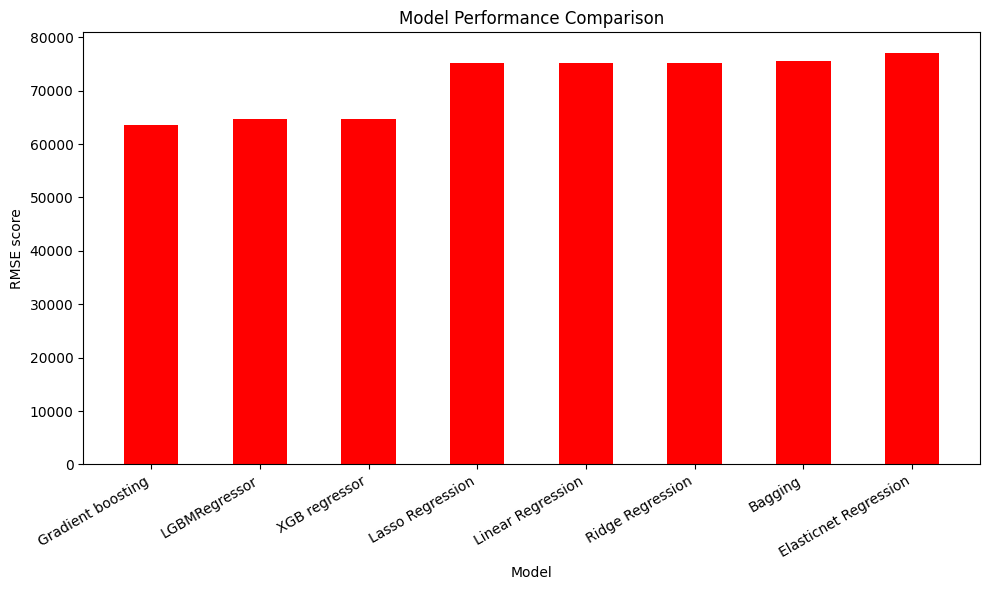

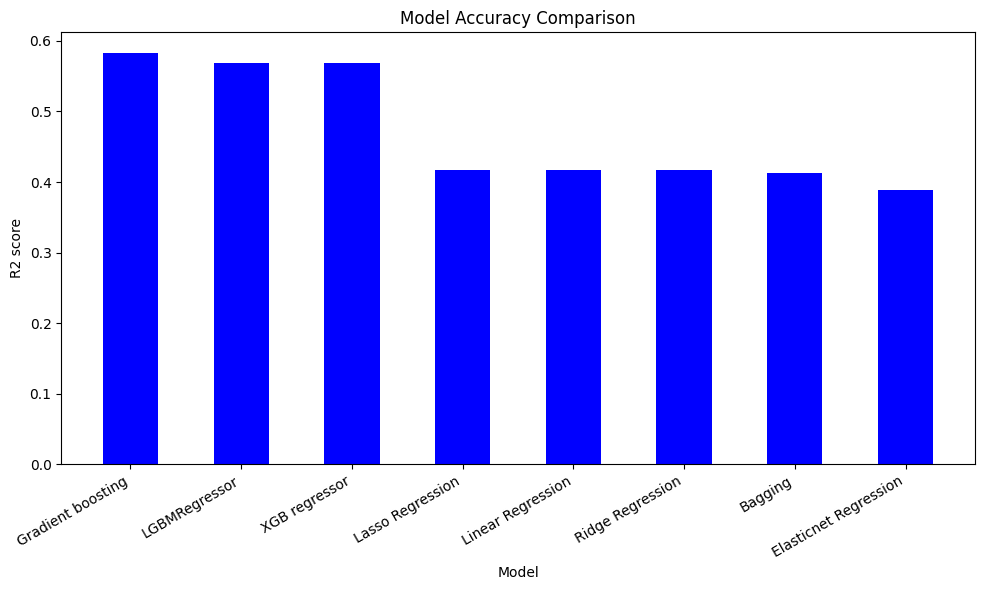

In [69]:
#Evaluation of all the metrics


#Score Evaluation in table format
score = {
    'mae_score': mae_scores,
    'mse_score': mse_scores,
    'rmse_score': rmse_scores,
    'r2_scores' : r2_scores,
}

model_score = pd.DataFrame(score, index=['Linear Regression', 'Lasso Regression', 'Elasticnet Regression', 'Ridge Regression', 'Bagging', 'Gradient boosting', 'XGB regressor', 'LGBMRegressor'])
print("\n\tScores of all the models in table")
display(model_score)

# Data
models =['Linear Regression', 'Lasso Regression', 'Elasticnet Regression', 'Ridge Regression', 'Bagging', 'Gradient boosting', 'XGB regressor', 'LGBMRegressor']

# Sorting the data by values in ascending order
sorted_indices = sorted(range(len(rmse_scores)), key=lambda k: rmse_scores[k])
models_sorted = [models[i] for i in sorted_indices]
values_sorted = [rmse_scores[i] for i in sorted_indices]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, values_sorted, color='red', width=0.5)
plt.xlabel('Model')
plt.ylabel('RMSE score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Sorting the data by values in ascending order
sorted_indices = sorted(range(len(r2_scores)), key=lambda k: r2_scores[k], reverse=True)
models_sorted = [models[i] for i in sorted_indices]
values_sorted = [r2_scores[i] for i in sorted_indices]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models_sorted, values_sorted, color='blue', width=0.5)
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

#### **4. Observation and Conclusion**

- The models **Linear**, **Ridge**, **Lasso**, **Elastic-Net**, **Bagging**, **Gradient**, **boosting**, **LGBMRegressor**, **XGB Regressor** are analysed
- From the 'Model performance comparision' visual **Gradient boosting regressor** is performing relatively better than other models
- From the 'Model Accuracy comaparision' visual **Gradient boosting regressor** r2 score is 0.58 which is better than other models
- So we can conclude that **Gradient boosting regressor** performs better than other models